## Runs DE on different clusters. Also runs DE within each cluster for each condition.
Does this over each donor and combined

In [1]:
# Input info
se_f = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/SE.rds"
sample_names = "preB,postB"
outdir = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnCond_RNA/minPct_0_logfc0.01/"

# Input info
# se_f = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/SE.rds"
# sample_names = "preB,postB"
# outdir = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/genes_donors_DE_minPct_00_pval0.1"

# Parameters
assay="RNA"
minPct = 0.00
logfcthresh = 0.25
top_de = 3
p_thresh=0.1
# test.use="wilcox"
# latent.vars = "NULL"

# Parallel processing
cores = 4

# R utils script
utils_script <- "/data/Mito_Trace/R_scripts/seurat_utils.R"



# Parameters
assay="RNA"
minPct = 0.00
logfcthresh = 0.25
top_de = 3
p_thresh=0.1
test.use="wilcox"
latent.vars = "NULL"

# Parallel processing
cores = 4

# R utils script
utils_script <- "/data/Mito_Trace/R_scripts/seurat_utils.R"



In [2]:
source(utils_script)
dir.create(outdir, showWarnings = FALSE)

btwnConds_inClust_sepDonrs.outdir <- file.path(outdir, "btwnConds_inClust_sepDonrs")
dir.create(btwnConds_inClust_sepDonrs.outdir)

btwnConds_inClust.outdir <- file.path(outdir, "btwnConds_inClust")
dir.create(btwnConds_inClust.outdir, showWarnings = FALSE)

Attaching SeuratObject

Warning message in dir.create(btwnConds_inClust_sepDonrs.outdir):
“'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs' already exists”


In [3]:
sample_names <- unlist(strsplit(sample_names, ",")[[1]])
sample_names

[1] "preB"  "postB"

In [4]:
library(GenomicRanges)
library(Seurat)
library(Signac)
library(GenomeInfoDb)
library(EnsDb.Hsapiens.v75)
library(ggplot2)
library(patchwork)
set.seed(1234)
library(data.table)
library(magrittr)
library(cowplot)
library(metap)
library("RColorBrewer")

library(future)
plan()

plan("multiprocess", workers = cores)
#options(future.globals.maxSize = 50000 * 1024^2) # for 50 Gb RAM
options(future.globals.maxSize = 8000 * 1024^2)

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading required package: ensembldb

Loading required package: GenomicFeatures

Loading required package: AnnotationDbi

Lo

sequential:
- args: function (..., envir = parent.frame())
- tweaked: FALSE
- call: NULL

Warning message:
"Strategy 'multiprocess' is deprecated in future (>= 1.20.0). Instead, explicitly specify either 'multisession' or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'."


In [5]:
se <- readRDS(se_f)#file.path(indir, paste0("allSamples.integrated.rds")))
se

An object of class Seurat 
61893 features across 4112 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap

# Stimulus specific response in each cluster 

## Each donor separately

In [6]:
se$condition.name <- as.factor(apply(se[[]][ , c("orig.ident", "seurat_clusters", "donor") ] , 1 , paste , collapse = "_" ))
se$condition.clust <- as.factor(apply(se[[]][ , c("orig.ident", "seurat_clusters") ] , 1 , paste , collapse = "_" ))

In [7]:
# get clust and donor information
source(utils_script)
clust.ids <- levels(se$seurat_clusters)
don.ids <- levels(se$donor)
#cols <- c("seurat_clusters", "donor")
curr.ids <- levels(as.factor(apply(se[[]][ , c( "seurat_clusters", "donor") ] , 1 , paste , collapse = "_" )))
# Setup Idents to include the condition, clusters and donor
Idents(se) <- as.factor(apply(se[[]][ , c("orig.ident", "seurat_clusters", "donor") ] , 1 , paste , collapse = "_" ))
se$curr.id = Idents(se)

# setup output
# all.pvals is gene-by-comparison df of the pvalue results
all.pvals <- data.frame(matrix(nrow=dim(se)[1],ncol=0),
                          row.names=row.names(se))
all.names.sig <- c()

# Loop through clusters and donors and compare between conditions
for (cl in clust.ids){
    if (cl == "None"){
        next
    }
    for (d in don.ids){
        if (d == "None"){
            print('Skipping None')
            next
        }
        c <- paste0(cl, "_", d)
        cl.names.sig = c()
        
        try({
            print("c")
            print(c)
            id1 <- paste(sample_names[[1]], c, sep="_")
            id2 <- paste(sample_names[[2]], c, sep="_")         
            curr.name <- c
            curr.name <- paste(c, sample_names[[1]], sample_names[[2]], sep='_')
            curr.clust.donor.outdir <- file.path(btwnConds_inClust_sepDonrs.outdir,
                                                 paste0("clust_", cl, "donor_", d))
            dir.create(curr.clust.donor.outdir)

            curr.sig <- find.markers.and.plot(se, id1, id2, curr.clust.donor.outdir, 
                                              curr.name=curr.name, 
                                  min.pct=minPct, p.thresh=p_thresh)
            if (length(names(curr.sig)) > 0){
                print("adding sig vals to all pvals")
                names.sig <- rownames(curr.sig)
                all.names.sig <- c(all.names.sig, head(names.sig, top_de))
                all.pvals[names.sig,curr.name] <- curr.sig$p_val_adj_BH
            }else{
                print("no sig variables found")
            }
        })
    }
}

[1] "c"
[1] "0_0"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_0donor_0' already exists"


[1] "curr sig"
                      p_val  avg_diff pct.1 pct.2   p_val_adj p_val_adj_BH
SURF4          3.642600e-07 0.2015272 0.342 0.013 0.007130389 0.0007853446
ARNT           1.313807e-06 0.2736449 0.526 0.100 0.025717765 0.0012424015
HTT            1.728759e-06 0.3252658 0.737 0.212 0.033840457 0.0012424015
TNFAIP3        3.139112e-06 0.3596588 0.579 0.138 0.061448115 0.0016919813
DLG4           5.451018e-06 0.3730808 0.711 0.238 0.106703668 0.0021043938
CTD-3214H19.16 6.832447e-06 0.1183115 0.237 0.000 0.133745158 0.0021043938
[1] "dim response"
[1] 2156    6
[1] "response plots"
                      p_val  avg_diff pct.1 pct.2   p_val_adj p_val_adj_BH
SURF4          3.642600e-07 0.2015272 0.342 0.013 0.007130389 0.0007853446
ARNT           1.313807e-06 0.2736449 0.526 0.100 0.025717765 0.0012424015
HTT            1.728759e-06 0.3252658 0.737 0.212 0.033840457 0.0012424015
TNFAIP3        3.139112e-06 0.3596588 0.579 0.138 0.061448115 0.0016919813
DLG4           5.451018e-06 0.3

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



                      p_val  avg_diff pct.1 pct.2   p_val_adj p_val_adj_BH
SURF4          3.642600e-07 0.2015272 0.342 0.013 0.007130389 0.0007853446
ARNT           1.313807e-06 0.2736449 0.526 0.100 0.025717765 0.0012424015
HTT            1.728759e-06 0.3252658 0.737 0.212 0.033840457 0.0012424015
TNFAIP3        3.139112e-06 0.3596588 0.579 0.138 0.061448115 0.0016919813
DLG4           5.451018e-06 0.3730808 0.711 0.238 0.106703668 0.0021043938
CTD-3214H19.16 6.832447e-06 0.1183115 0.237 0.000 0.133745158 0.0021043938


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "c"
[1] "0_1"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_0donor_1' already exists"


[1] "curr sig"
                p_val   avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
TMEM132B 4.700165e-08 -0.2667770 0.072 0.410 0.0009200573 6.509728e-05
TMEM43   1.357027e-05  0.2245357 0.454 0.141 0.2656380255 4.788431e-03
CEP85    1.744799e-05  0.2234908 0.464 0.154 0.3415444921 4.788431e-03
WDYHV1   1.820941e-05  0.2042229 0.433 0.128 0.3564492354 4.788431e-03
FOXO1    1.825242e-05  0.2856917 0.742 0.449 0.3572911120 4.788431e-03
CASP9    2.648968e-05  0.3143639 0.660 0.321 0.5185354101 4.788431e-03
[1] "dim response"
[1] 1385    6
[1] "response plots"
                p_val   avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
TMEM132B 4.700165e-08 -0.2667770 0.072 0.410 0.0009200573 6.509728e-05
TMEM43   1.357027e-05  0.2245357 0.454 0.141 0.2656380255 4.788431e-03
CEP85    1.744799e-05  0.2234908 0.464 0.154 0.3415444921 4.788431e-03
WDYHV1   1.820941e-05  0.2042229 0.433 0.128 0.3564492354 4.788431e-03
FOXO1    1.825242e-05  0.2856917 0.742 0.449 0.3572911120 4.788431e-03
CASP9   

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



                p_val   avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
TMEM132B 4.700165e-08 -0.2667770 0.072 0.410 0.0009200573 6.509728e-05
TMEM43   1.357027e-05  0.2245357 0.454 0.141 0.2656380255 4.788431e-03
CEP85    1.744799e-05  0.2234908 0.464 0.154 0.3415444921 4.788431e-03
WDYHV1   1.820941e-05  0.2042229 0.433 0.128 0.3564492354 4.788431e-03
FOXO1    1.825242e-05  0.2856917 0.742 0.449 0.3572911120 4.788431e-03
CASP9    2.648968e-05  0.3143639 0.660 0.321 0.5185354101 4.788431e-03


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "c"
[1] "0_2"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_0donor_2' already exists"


[1] "curr sig"
                     p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
STAP2         6.558942e-05  0.4857979 0.647 0.048         1   0.08862905
JUND          1.533352e-04  0.3566799 0.618 0.048         1   0.08862905
CTD-3138B18.4 1.656003e-04  0.3845546 0.500 0.000         1   0.08862905
SAP30         2.076520e-04  0.4634785 0.559 0.048         1   0.08862905
RP1-158P9.3   2.677912e-04 -0.4184715 0.029 0.429         1   0.08862905
CAMK2D        2.901027e-04 -0.5302774 0.588 0.810         1   0.08862905
[1] "dim response"
[1] 4165    6
[1] "response plots"
                     p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
STAP2         6.558942e-05  0.4857979 0.647 0.048         1   0.08862905
JUND          1.533352e-04  0.3566799 0.618 0.048         1   0.08862905
CTD-3138B18.4 1.656003e-04  0.3845546 0.500 0.000         1   0.08862905
SAP30         2.076520e-04  0.4634785 0.559 0.048         1   0.08862905
RP1-158P9.3   2.677912e-04 -0.4184715 0.029 0.429      

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



                     p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
STAP2         6.558942e-05  0.4857979 0.647 0.048         1   0.08862905
JUND          1.533352e-04  0.3566799 0.618 0.048         1   0.08862905
CTD-3138B18.4 1.656003e-04  0.3845546 0.500 0.000         1   0.08862905
SAP30         2.076520e-04  0.4634785 0.559 0.048         1   0.08862905
RP1-158P9.3   2.677912e-04 -0.4184715 0.029 0.429         1   0.08862905
CAMK2D        2.901027e-04 -0.5302774 0.588 0.810         1   0.08862905


Saving 6.67 x 6.67 in image

Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"


[1] "adding sig vals to all pvals"
[1] "c"
[1] "0_3"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_0donor_3' already exists"


[1] "curr sig"
                p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
UTY      1.853889e-24 0.1597706 0.255 0.000 3.628987e-20 2.306237e-21
DDX3Y    7.445817e-21 0.1353880 0.216 0.000 1.457519e-16 4.631298e-18
ZFY      1.708041e-15 0.1002464 0.157 0.000 3.343491e-11 7.082677e-13
HMGB2    2.037018e-08 0.3354392 0.686 0.271 3.987463e-04 6.335127e-06
C20orf82 3.093721e-07 0.3117943 0.588 0.241 6.055958e-03 7.697177e-05
TAGAP    7.532170e-07 0.2616066 0.529 0.209 1.474422e-02 1.561670e-04
[1] "dim response"
[1] 1244    6
[1] "response plots"
                p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
UTY      1.853889e-24 0.1597706 0.255 0.000 3.628987e-20 2.306237e-21
DDX3Y    7.445817e-21 0.1353880 0.216 0.000 1.457519e-16 4.631298e-18
ZFY      1.708041e-15 0.1002464 0.157 0.000 3.343491e-11 7.082677e-13
HMGB2    2.037018e-08 0.3354392 0.686 0.271 3.987463e-04 6.335127e-06
C20orf82 3.093721e-07 0.3117943 0.588 0.241 6.055958e-03 7.697177e-05
TAGAP    7.532170e-07

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



                p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
UTY      1.853889e-24 0.1597706 0.255 0.000 3.628987e-20 2.306237e-21
DDX3Y    7.445817e-21 0.1353880 0.216 0.000 1.457519e-16 4.631298e-18
ZFY      1.708041e-15 0.1002464 0.157 0.000 3.343491e-11 7.082677e-13
HMGB2    2.037018e-08 0.3354392 0.686 0.271 3.987463e-04 6.335127e-06
C20orf82 3.093721e-07 0.3117943 0.588 0.241 6.055958e-03 7.697177e-05
TAGAP    7.532170e-07 0.2616066 0.529 0.209 1.474422e-02 1.561670e-04


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "Skipping None"
[1] "c"
[1] "1_0"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_1donor_0' already exists"


[1] "curr sig"
              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
ZNF846 1.578619e-09 0.3832246 0.818 0.212 3.090146e-05 3.330885e-06
NAIF1  3.192988e-08 0.2977476 0.745 0.173 6.250273e-04 3.368602e-05
KDELR2 1.872433e-07 0.2203881 0.600 0.077 3.665288e-03 1.316945e-04
SDCBP2 3.338844e-07 0.1989069 0.509 0.038 6.535788e-03 1.602350e-04
RBX1   3.797038e-07 0.2714338 0.691 0.154 7.432701e-03 1.602350e-04
P4HB   6.161821e-07 0.2521705 0.709 0.192 1.206177e-02 2.166907e-04
[1] "dim response"
[1] 2110    6
[1] "response plots"
              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
ZNF846 1.578619e-09 0.3832246 0.818 0.212 3.090146e-05 3.330885e-06
NAIF1  3.192988e-08 0.2977476 0.745 0.173 6.250273e-04 3.368602e-05
KDELR2 1.872433e-07 0.2203881 0.600 0.077 3.665288e-03 1.316945e-04
SDCBP2 3.338844e-07 0.1989069 0.509 0.038 6.535788e-03 1.602350e-04
RBX1   3.797038e-07 0.2714338 0.691 0.154 7.432701e-03 1.602350e-04
P4HB   6.161821e-07 0.2521705 0.709 0.192 1.206

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
ZNF846 1.578619e-09 0.3832246 0.818 0.212 3.090146e-05 3.330885e-06
NAIF1  3.192988e-08 0.2977476 0.745 0.173 6.250273e-04 3.368602e-05
KDELR2 1.872433e-07 0.2203881 0.600 0.077 3.665288e-03 1.316945e-04
SDCBP2 3.338844e-07 0.1989069 0.509 0.038 6.535788e-03 1.602350e-04
RBX1   3.797038e-07 0.2714338 0.691 0.154 7.432701e-03 1.602350e-04
P4HB   6.161821e-07 0.2521705 0.709 0.192 1.206177e-02 2.166907e-04


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "c"
[1] "1_1"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_1donor_1' already exists"


[1] "curr sig"
[1] p_val        avg_diff     pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 2595    6
[1] "response plots"
                p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
LEMD3    8.789902e-05  0.3069488 0.590 0.077         1    0.1567717
PRADC1   1.861573e-04  0.3570643 0.538 0.077         1    0.1567717
CCT7     1.861573e-04  0.3612134 0.538 0.077         1    0.1567717
FAM135B  2.637129e-04 -0.1770383 0.000 0.308         1    0.1567717
C1orf112 3.390714e-04  0.3660109 0.692 0.192         1    0.1567717
ADGRE5   4.183393e-04  0.2493242 0.385 0.000         1    0.1567717
character(0)
Error in FetchData(object = object, vars = features, cells = cells) : 
  None of the requested variables were found: 
[1] "c"
[1] "1_2"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_1donor_2' already exists"


[1] "curr sig"
                    p_val   avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
TRIB1        1.876446e-06  0.3388729 0.600  0.04 0.03673143  0.005282195
FSTL4        1.811681e-05 -0.4306264 0.238  0.64 0.35463657  0.016655015
PNKP         2.046687e-05  0.4150863 0.800  0.28 0.40063902  0.016655015
NTRK3        2.835478e-05 -0.3213238 0.100  0.44 0.55504488  0.016655015
GCSH         2.964537e-05  0.2555374 0.512  0.04 0.58030814  0.016655015
RP11-792A8.5 4.242134e-05  0.4556436 0.863  0.40 0.83039782  0.016655015
[1] "dim response"
[1] 2815    6
[1] "response plots"
                    p_val   avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
TRIB1        1.876446e-06  0.3388729 0.600  0.04 0.03673143  0.005282195
FSTL4        1.811681e-05 -0.4306264 0.238  0.64 0.35463657  0.016655015
PNKP         2.046687e-05  0.4150863 0.800  0.28 0.40063902  0.016655015
NTRK3        2.835478e-05 -0.3213238 0.100  0.44 0.55504488  0.016655015
GCSH         2.964537e-05  0.2555374 0.512  0.04 0.5803

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



                    p_val   avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
TRIB1        1.876446e-06  0.3388729 0.600  0.04 0.03673143  0.005282195
FSTL4        1.811681e-05 -0.4306264 0.238  0.64 0.35463657  0.016655015
PNKP         2.046687e-05  0.4150863 0.800  0.28 0.40063902  0.016655015
NTRK3        2.835478e-05 -0.3213238 0.100  0.44 0.55504488  0.016655015
GCSH         2.964537e-05  0.2555374 0.512  0.04 0.58030814  0.016655015
RP11-792A8.5 4.242134e-05  0.4556436 0.863  0.40 0.83039782  0.016655015


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "c"
[1] "1_3"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_1donor_3' already exists"


[1] "curr sig"
                p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
UTY      3.847703e-20 0.1928994 0.300 0.000 7.531879e-16 4.290189e-17
DDX3Y    1.544532e-18 0.1199949 0.275 0.000 3.023422e-14 8.610768e-16
ZFY      2.350593e-15 0.1091274 0.225 0.000 4.601287e-11 6.552279e-13
EIF1AY   2.350593e-15 0.1091315 0.225 0.000 4.601287e-11 6.552279e-13
TMEM191B 9.628769e-08 0.1092599 0.225 0.026 1.884832e-03 2.147215e-05
BCL3     3.540606e-07 0.2115940 0.625 0.232 6.930737e-03 6.579627e-05
[1] "dim response"
[1] 1115    6
[1] "response plots"
                p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
UTY      3.847703e-20 0.1928994 0.300 0.000 7.531879e-16 4.290189e-17
DDX3Y    1.544532e-18 0.1199949 0.275 0.000 3.023422e-14 8.610768e-16
ZFY      2.350593e-15 0.1091274 0.225 0.000 4.601287e-11 6.552279e-13
EIF1AY   2.350593e-15 0.1091315 0.225 0.000 4.601287e-11 6.552279e-13
TMEM191B 9.628769e-08 0.1092599 0.225 0.026 1.884832e-03 2.147215e-05
BCL3     3.540606e-07

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



                p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
UTY      3.847703e-20 0.1928994 0.300 0.000 7.531879e-16 4.290189e-17
DDX3Y    1.544532e-18 0.1199949 0.275 0.000 3.023422e-14 8.610768e-16
ZFY      2.350593e-15 0.1091274 0.225 0.000 4.601287e-11 6.552279e-13
EIF1AY   2.350593e-15 0.1091315 0.225 0.000 4.601287e-11 6.552279e-13
TMEM191B 9.628769e-08 0.1092599 0.225 0.026 1.884832e-03 2.147215e-05
BCL3     3.540606e-07 0.2115940 0.625 0.232 6.930737e-03 6.579627e-05


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "Skipping None"
[1] "c"
[1] "2_0"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_2donor_0' already exists"


[1] "curr sig"
[1] p_val        avg_diff     pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 3425    6
[1] "response plots"
                p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
PTCH1    8.757507e-05  0.4118145 0.375 0.000         1    0.1223313
RAPGEF1  1.310020e-04  0.5382122 0.542 0.111         1    0.1223313
ATP1B1   1.506432e-04  0.3819920 0.417 0.028         1    0.1223313
SLC35B3  2.348792e-04  0.3263862 0.417 0.028         1    0.1223313
PCYOX1   2.475530e-04  0.2887198 0.333 0.000         1    0.1223313
SLC25A21 2.720461e-04 -0.5642886 0.083 0.528         1    0.1223313
character(0)
Error in FetchData(object = object, vars = features, cells = cells) : 
  None of the requested variables were found: 
[1] "c"
[1] "2_1"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_2donor_1' already exists"


[1] "curr sig"
[1] p_val        avg_diff     pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 2289    6
[1] "response plots"
                p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
ZNF846   7.027776e-05  0.4292417 0.556 0.150         1    0.1149527
XPO1     1.825979e-04  0.4275794 0.540 0.175         1    0.1149527
CCBE1    3.035326e-04 -0.2411900 0.032 0.275         1    0.1149527
EPB41L4A 3.986104e-04 -0.3066661 0.111 0.400         1    0.1149527
TRDN     5.196458e-04 -0.3258277 0.095 0.375         1    0.1149527
PIK3C2A  5.513555e-04  0.2450265 0.302 0.025         1    0.1149527
character(0)
Error in FetchData(object = object, vars = features, cells = cells) : 
  None of the requested variables were found: 
[1] "c"
[1] "2_2"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_2donor_2' already exists"


[1] "curr sig"
              p_val   avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
FNBP1L 1.614991e-14 -0.6704635     0   0.6 3.161344e-10 9.510680e-11
PALMD  4.740623e-10 -0.3507792     0   0.4 9.279770e-06 2.537957e-07
TBX15  4.740623e-10 -0.4488564     0   0.4 9.279770e-06 2.537957e-07
ADCY5  4.740623e-10 -0.4794076     0   0.4 9.279770e-06 2.537957e-07
GIMAP1 4.740623e-10 -0.4682976     0   0.4 9.279770e-06 2.537957e-07
TTPA   4.740623e-10 -0.4682976     0   0.4 9.279770e-06 2.537957e-07
[1] "dim response"
[1] 5889    6
[1] "response plots"
              p_val   avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
FNBP1L 1.614991e-14 -0.6704635     0   0.6 3.161344e-10 9.510680e-11
PALMD  4.740623e-10 -0.3507792     0   0.4 9.279770e-06 2.537957e-07
TBX15  4.740623e-10 -0.4488564     0   0.4 9.279770e-06 2.537957e-07
ADCY5  4.740623e-10 -0.4794076     0   0.4 9.279770e-06 2.537957e-07
GIMAP1 4.740623e-10 -0.4682976     0   0.4 9.279770e-06 2.537957e-07
TTPA   4.740623e-10 -0.4682976    

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



              p_val   avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
FNBP1L 1.614991e-14 -0.6704635     0   0.6 3.161344e-10 9.510680e-11
PALMD  4.740623e-10 -0.3507792     0   0.4 9.279770e-06 2.537957e-07
TBX15  4.740623e-10 -0.4488564     0   0.4 9.279770e-06 2.537957e-07
ADCY5  4.740623e-10 -0.4794076     0   0.4 9.279770e-06 2.537957e-07
GIMAP1 4.740623e-10 -0.4682976     0   0.4 9.279770e-06 2.537957e-07
TTPA   4.740623e-10 -0.4682976     0   0.4 9.279770e-06 2.537957e-07


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "c"
[1] "2_3"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_2donor_3' already exists"


[1] "curr sig"
               p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
EIF1AY  5.002533e-14 0.2125494 0.233 0.000 9.792459e-10 1.058536e-10
DDX3Y   3.418668e-12 0.2189773 0.200 0.000 6.692043e-08 2.411301e-09
UTY     3.418668e-12 0.2164260 0.200 0.000 6.692043e-08 2.411301e-09
ZFY     2.295127e-10 0.1270315 0.167 0.000 4.492712e-06 1.214122e-07
RPS4Y1  1.008621e-06 0.1082182 0.100 0.000 1.974375e-02 4.268483e-04
FAM129C 1.243490e-06 0.1886775 0.267 0.038 2.434131e-02 4.376146e-04
[1] "dim response"
[1] 2116    6
[1] "response plots"
               p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
EIF1AY  5.002533e-14 0.2125494 0.233 0.000 9.792459e-10 1.058536e-10
DDX3Y   3.418668e-12 0.2189773 0.200 0.000 6.692043e-08 2.411301e-09
UTY     3.418668e-12 0.2164260 0.200 0.000 6.692043e-08 2.411301e-09
ZFY     2.295127e-10 0.1270315 0.167 0.000 4.492712e-06 1.214122e-07
RPS4Y1  1.008621e-06 0.1082182 0.100 0.000 1.974375e-02 4.268483e-04
FAM129C 1.243490e-06 0.1886775 0.2

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



               p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
EIF1AY  5.002533e-14 0.2125494 0.233 0.000 9.792459e-10 1.058536e-10
DDX3Y   3.418668e-12 0.2189773 0.200 0.000 6.692043e-08 2.411301e-09
UTY     3.418668e-12 0.2164260 0.200 0.000 6.692043e-08 2.411301e-09
ZFY     2.295127e-10 0.1270315 0.167 0.000 4.492712e-06 1.214122e-07
RPS4Y1  1.008621e-06 0.1082182 0.100 0.000 1.974375e-02 4.268483e-04
FAM129C 1.243490e-06 0.1886775 0.267 0.038 2.434131e-02 4.376146e-04


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "Skipping None"
[1] "c"
[1] "3_0"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_3donor_0' already exists"


[1] "curr sig"
                      p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
KLF2           1.316182e-05 0.2761289 0.636 0.103 0.2576427   0.01475002
COQ7           1.492469e-05 0.2647021 0.636 0.069 0.2921509   0.01475002
ZNF575         1.972493e-05 0.3159245 0.788 0.172 0.3861155   0.01475002
HMHA1          2.488338e-05 0.3134270 0.636 0.069 0.4870921   0.01475002
RP11-216L13.17 3.576245e-05 0.3392124 0.727 0.172 0.7000500   0.01475002
RBM14          4.220438e-05 0.2619434 0.727 0.172 0.8261507   0.01475002
[1] "dim response"
[1] 2678    6
[1] "response plots"
                      p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
KLF2           1.316182e-05 0.2761289 0.636 0.103 0.2576427   0.01475002
COQ7           1.492469e-05 0.2647021 0.636 0.069 0.2921509   0.01475002
ZNF575         1.972493e-05 0.3159245 0.788 0.172 0.3861155   0.01475002
HMHA1          2.488338e-05 0.3134270 0.636 0.069 0.4870921   0.01475002
RP11-216L13.17 3.576245e-05 0.3392124 0.727 0.172 0.700

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



                      p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
KLF2           1.316182e-05 0.2761289 0.636 0.103 0.2576427   0.01475002
COQ7           1.492469e-05 0.2647021 0.636 0.069 0.2921509   0.01475002
ZNF575         1.972493e-05 0.3159245 0.788 0.172 0.3861155   0.01475002
HMHA1          2.488338e-05 0.3134270 0.636 0.069 0.4870921   0.01475002
RP11-216L13.17 3.576245e-05 0.3392124 0.727 0.172 0.7000500   0.01475002
RBM14          4.220438e-05 0.2619434 0.727 0.172 0.8261507   0.01475002


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "c"
[1] "3_1"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_3donor_1' already exists"


[1] "curr sig"
                p_val  avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
KAT7     1.483174e-06 0.3125969 0.617  0.14 0.02903312  0.001956189
HMOX2    2.047294e-06 0.3096994 0.533  0.10 0.04007577  0.001956189
DNAJB1   6.758990e-06 0.3792589 0.783  0.30 0.13230723  0.003652249
PTP4A2   9.354226e-06 0.2433843 0.600  0.14 0.18310897  0.003652249
STARD7   1.126505e-05 0.2101823 0.417  0.04 0.22051335  0.003652249
B3GALNT2 1.321162e-05 0.2167806 0.433  0.06 0.25861754  0.003652249
[1] "dim response"
[1] 1911    6
[1] "response plots"
                p_val  avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
KAT7     1.483174e-06 0.3125969 0.617  0.14 0.02903312  0.001956189
HMOX2    2.047294e-06 0.3096994 0.533  0.10 0.04007577  0.001956189
DNAJB1   6.758990e-06 0.3792589 0.783  0.30 0.13230723  0.003652249
PTP4A2   9.354226e-06 0.2433843 0.600  0.14 0.18310897  0.003652249
STARD7   1.126505e-05 0.2101823 0.417  0.04 0.22051335  0.003652249
B3GALNT2 1.321162e-05 0.2167806 0.433  0.06 0.2

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



                p_val  avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
KAT7     1.483174e-06 0.3125969 0.617  0.14 0.02903312  0.001956189
HMOX2    2.047294e-06 0.3096994 0.533  0.10 0.04007577  0.001956189
DNAJB1   6.758990e-06 0.3792589 0.783  0.30 0.13230723  0.003652249
PTP4A2   9.354226e-06 0.2433843 0.600  0.14 0.18310897  0.003652249
STARD7   1.126505e-05 0.2101823 0.417  0.04 0.22051335  0.003652249
B3GALNT2 1.321162e-05 0.2167806 0.433  0.06 0.25861754  0.003652249


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "c"
[1] "3_2"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_3donor_2' already exists"


[1] "curr sig"
[1] p_val        avg_diff     pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 5460    6
[1] "response plots"
                p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
PAN3     4.229148e-05 -0.7847131 0.214   1.0 0.8278558    0.2309115
CASP9    9.118584e-04  0.5944208 0.786   0.1 1.0000000    0.3572004
DNAJC16  1.211572e-03  0.5809296 0.714   0.0 1.0000000    0.3572004
SLC30A10 1.401565e-03 -0.4224782 0.000   0.6 1.0000000    0.3572004
PDGFD    1.401565e-03 -0.5557229 0.000   0.6 1.0000000    0.3572004
SMARCA5  1.965816e-03 -0.5603485 0.214   0.8 1.0000000    0.3572004
character(0)
Error in FetchData(object = object, vars = features, cells = cells) : 
  None of the requested variables were found: 
[1] "c"
[1] "3_3"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_3donor_3' already exists"


[1] "curr sig"
              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
DDX3Y  7.984697e-31 0.2414640 0.500 0.000 1.563005e-26 2.036098e-27
RPS4Y1 4.152506e-18 0.1359812 0.286 0.000 8.128531e-14 3.529630e-15
EIF1AY 4.152506e-18 0.1371601 0.286 0.000 8.128531e-14 3.529630e-15
UTY    6.566188e-14 0.1640451 0.214 0.000 1.285331e-09 4.185945e-11
SCIMP  5.530058e-08 0.1885138 0.286 0.019 1.082509e-03 2.820330e-05
CHADL  8.936277e-08 0.1647581 0.429 0.050 1.749276e-03 3.797918e-05
[1] "dim response"
[1] 2550    6
[1] "response plots"
              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
DDX3Y  7.984697e-31 0.2414640 0.500 0.000 1.563005e-26 2.036098e-27
RPS4Y1 4.152506e-18 0.1359812 0.286 0.000 8.128531e-14 3.529630e-15
EIF1AY 4.152506e-18 0.1371601 0.286 0.000 8.128531e-14 3.529630e-15
UTY    6.566188e-14 0.1640451 0.214 0.000 1.285331e-09 4.185945e-11
SCIMP  5.530058e-08 0.1885138 0.286 0.019 1.082509e-03 2.820330e-05
CHADL  8.936277e-08 0.1647581 0.429 0.050 1.749

The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
DDX3Y  7.984697e-31 0.2414640 0.500 0.000 1.563005e-26 2.036098e-27
RPS4Y1 4.152506e-18 0.1359812 0.286 0.000 8.128531e-14 3.529630e-15
EIF1AY 4.152506e-18 0.1371601 0.286 0.000 8.128531e-14 3.529630e-15
UTY    6.566188e-14 0.1640451 0.214 0.000 1.285331e-09 4.185945e-11
SCIMP  5.530058e-08 0.1885138 0.286 0.019 1.082509e-03 2.820330e-05
CHADL  8.936277e-08 0.1647581 0.429 0.050 1.749276e-03 3.797918e-05


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "Skipping None"
[1] "c"
[1] "4_0"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_4donor_0' already exists"


[1] "curr sig"
                    p_val  avg_diff pct.1 pct.2   p_val_adj p_val_adj_BH
FUNDC2       2.369535e-07 0.2667435  0.68 0.054 0.004638365 0.0007518535
CTLA4        2.690392e-06 0.3372537  0.64 0.081 0.052664415 0.0024444933
INTS9        3.187853e-06 0.3778322  0.88 0.216 0.062402232 0.0024444933
RP11-371E8.4 3.228405e-06 0.3240090  0.60 0.054 0.063196021 0.0024444933
SNN          3.852022e-06 0.2277779  0.60 0.054 0.075403336 0.0024444933
HS1BP3       5.462836e-06 0.2708746  0.60 0.054 0.106935007 0.0024762253
[1] "dim response"
[1] 3173    6
[1] "response plots"
                    p_val  avg_diff pct.1 pct.2   p_val_adj p_val_adj_BH
FUNDC2       2.369535e-07 0.2667435  0.68 0.054 0.004638365 0.0007518535
CTLA4        2.690392e-06 0.3372537  0.64 0.081 0.052664415 0.0024444933
INTS9        3.187853e-06 0.3778322  0.88 0.216 0.062402232 0.0024444933
RP11-371E8.4 3.228405e-06 0.3240090  0.60 0.054 0.063196021 0.0024444933
SNN          3.852022e-06 0.2277779  0.60 0.054 0.07540

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



                    p_val  avg_diff pct.1 pct.2   p_val_adj p_val_adj_BH
FUNDC2       2.369535e-07 0.2667435  0.68 0.054 0.004638365 0.0007518535
CTLA4        2.690392e-06 0.3372537  0.64 0.081 0.052664415 0.0024444933
INTS9        3.187853e-06 0.3778322  0.88 0.216 0.062402232 0.0024444933
RP11-371E8.4 3.228405e-06 0.3240090  0.60 0.054 0.063196021 0.0024444933
SNN          3.852022e-06 0.2277779  0.60 0.054 0.075403336 0.0024444933
HS1BP3       5.462836e-06 0.2708746  0.60 0.054 0.106935007 0.0024762253


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "c"
[1] "4_1"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_4donor_1' already exists"


[1] "curr sig"
                  p_val  avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
CRTC2      3.729773e-07 0.3247969 0.593 0.043 0.00730103 0.0009566867
TDRD7      6.182211e-06 0.2626863 0.519 0.065 0.12101679 0.0079286861
AC003002.4 2.064449e-05 0.2743517 0.519 0.065 0.40411585 0.0176510371
BCAT2      5.878101e-05 0.2357219 0.407 0.043 1.00000000 0.0334932483
TMEM52     7.480458e-05 0.3199057 0.630 0.152 1.00000000 0.0334932483
SH3GL1     8.557803e-05 0.3918303 0.741 0.304 1.00000000 0.0334932483
[1] "dim response"
[1] 2565    6
[1] "response plots"
                  p_val  avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
CRTC2      3.729773e-07 0.3247969 0.593 0.043 0.00730103 0.0009566867
TDRD7      6.182211e-06 0.2626863 0.519 0.065 0.12101679 0.0079286861
AC003002.4 2.064449e-05 0.2743517 0.519 0.065 0.40411585 0.0176510371
BCAT2      5.878101e-05 0.2357219 0.407 0.043 1.00000000 0.0334932483
TMEM52     7.480458e-05 0.3199057 0.630 0.152 1.00000000 0.0334932483
SH3GL1     8.557803e-

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



                  p_val  avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
CRTC2      3.729773e-07 0.3247969 0.593 0.043 0.00730103 0.0009566867
TDRD7      6.182211e-06 0.2626863 0.519 0.065 0.12101679 0.0079286861
AC003002.4 2.064449e-05 0.2743517 0.519 0.065 0.40411585 0.0176510371
BCAT2      5.878101e-05 0.2357219 0.407 0.043 1.00000000 0.0334932483
TMEM52     7.480458e-05 0.3199057 0.630 0.152 1.00000000 0.0334932483
SH3GL1     8.557803e-05 0.3918303 0.741 0.304 1.00000000 0.0334932483


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "c"
[1] "4_2"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_4donor_2' already exists"


[1] "curr sig"
[1] p_val        avg_diff     pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 7551    6
[1] "response plots"
               p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
MAN1C1   0.005741142 0.6120327     1     0         1    0.5566345
SH3BP5L  0.005741142 0.5233519     1     0         1    0.5566345
KIAA0895 0.005741142 0.7209358     1     0         1    0.5566345
PSAT1    0.005741142 0.6215246     1     0         1    0.5566345
RABGAP1  0.005741142 0.5671989     1     0         1    0.5566345
PPP3CB   0.005741142 0.5233519     1     0         1    0.5566345
character(0)
Error in FetchData(object = object, vars = features, cells = cells) : 
  None of the requested variables were found: 
[1] "c"
[1] "4_3"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_4donor_3' already exists"


[1] "curr sig"
              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
DDX3Y  1.396022e-16 0.2162360 0.387 0.000 2.732713e-12 2.109389e-13
ZFY    1.233073e-12 0.1450377 0.290 0.000 2.413741e-08 9.315870e-10
UTY    2.428733e-07 0.1140950 0.194 0.006 4.754245e-03 1.223272e-04
ERCC2  1.242147e-06 0.2355789 0.452 0.108 2.431502e-02 4.692210e-04
CALR   9.141341e-06 0.2348650 0.581 0.210 1.789418e-01 2.509635e-03
TOM1L2 1.100177e-05 0.3525695 0.806 0.443 2.153596e-01 2.509635e-03
[1] "dim response"
[1] 1511    6
[1] "response plots"
              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
DDX3Y  1.396022e-16 0.2162360 0.387 0.000 2.732713e-12 2.109389e-13
ZFY    1.233073e-12 0.1450377 0.290 0.000 2.413741e-08 9.315870e-10
UTY    2.428733e-07 0.1140950 0.194 0.006 4.754245e-03 1.223272e-04
ERCC2  1.242147e-06 0.2355789 0.452 0.108 2.431502e-02 4.692210e-04
CALR   9.141341e-06 0.2348650 0.581 0.210 1.789418e-01 2.509635e-03
TOM1L2 1.100177e-05 0.3525695 0.806 0.443 2.153

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
DDX3Y  1.396022e-16 0.2162360 0.387 0.000 2.732713e-12 2.109389e-13
ZFY    1.233073e-12 0.1450377 0.290 0.000 2.413741e-08 9.315870e-10
UTY    2.428733e-07 0.1140950 0.194 0.006 4.754245e-03 1.223272e-04
ERCC2  1.242147e-06 0.2355789 0.452 0.108 2.431502e-02 4.692210e-04
CALR   9.141341e-06 0.2348650 0.581 0.210 1.789418e-01 2.509635e-03
TOM1L2 1.100177e-05 0.3525695 0.806 0.443 2.153596e-01 2.509635e-03


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "Skipping None"
[1] "c"
[1] "5_0"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_5donor_0' already exists"


[1] "curr sig"
              p_val   avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
ZNF562 7.848746e-07 -0.2940949 0.031 0.778 0.01536392  0.002775317
[1] "dim response"
[1] 3536    6
[1] "response plots"
              p_val   avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
ZNF562 7.848746e-07 -0.2940949 0.031 0.778 0.01536392  0.002775317
FBXO9  1.115020e-04 -0.3935765 0.656 1.000 1.00000000  0.154145333
TSTD3  2.551846e-04 -0.2395706 0.125 0.667 1.00000000  0.154145333
NARS2  2.758004e-04  0.2673561 0.781 0.000 1.00000000  0.154145333
HENMT1 4.194600e-04 -0.3060633 0.281 0.778 1.00000000  0.154145333
NLK    5.369476e-04 -0.3182684 0.750 1.000 1.00000000  0.154145333
[1] "ZNF562"


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



              p_val   avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
ZNF562 7.848746e-07 -0.2940949 0.031 0.778 0.01536392  0.002775317
FBXO9  1.115020e-04 -0.3935765 0.656 1.000 1.00000000  0.154145333
TSTD3  2.551846e-04 -0.2395706 0.125 0.667 1.00000000  0.154145333
NARS2  2.758004e-04  0.2673561 0.781 0.000 1.00000000  0.154145333
HENMT1 4.194600e-04 -0.3060633 0.281 0.778 1.00000000  0.154145333
NLK    5.369476e-04 -0.3182684 0.750 1.000 1.00000000  0.154145333


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "c"
[1] "5_1"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_5donor_1' already exists"


[1] "curr sig"
[1] p_val        avg_diff     pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 3763    6
[1] "response plots"
                p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
CNTRL    0.0001070075 0.3969353 0.862 0.167         1    0.1314257
MROH1    0.0002268637 0.3068682 0.828 0.167         1    0.1314257
ZNF789   0.0002334340 0.3225272 0.690 0.000         1    0.1314257
C19orf40 0.0004056884 0.2747658 0.655 0.000         1    0.1314257
PIK3C2B  0.0006889897 0.1800271 0.621 0.000         1    0.1314257
IFRD2    0.0006889897 0.2258678 0.621 0.000         1    0.1314257
character(0)
Error in FetchData(object = object, vars = features, cells = cells) : 
  None of the requested variables were found: 
[1] "c"
[1] "5_2"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_5donor_2' already exists"


Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 2 has fewer than 3 cells
[1] "c"
[1] "5_3"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_5donor_3' already exists"


[1] "curr sig"
              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
UTY    3.341165e-36 0.3000098 0.889 0.000 6.540331e-32 7.631222e-33
NBPF26 2.865207e-27 0.2015371 0.667 0.000 5.608644e-23 2.181378e-24
EIF1AY 2.865207e-27 0.1924840 0.667 0.000 5.608644e-23 2.181378e-24
ZFY    7.219875e-23 0.2132332 0.556 0.000 1.413291e-18 3.298039e-20
DDX3Y  7.219875e-23 0.1682126 0.556 0.000 1.413291e-18 3.298039e-20
SOX8   7.325404e-09 0.1084464 0.556 0.041 1.433948e-04 2.788537e-06
[1] "dim response"
[1] 2284    6
[1] "response plots"
              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
UTY    3.341165e-36 0.3000098 0.889 0.000 6.540331e-32 7.631222e-33
NBPF26 2.865207e-27 0.2015371 0.667 0.000 5.608644e-23 2.181378e-24
EIF1AY 2.865207e-27 0.1924840 0.667 0.000 5.608644e-23 2.181378e-24
ZFY    7.219875e-23 0.2132332 0.556 0.000 1.413291e-18 3.298039e-20
DDX3Y  7.219875e-23 0.1682126 0.556 0.000 1.413291e-18 3.298039e-20
SOX8   7.325404e-09 0.1084464 0.556 0.041 1.433

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
UTY    3.341165e-36 0.3000098 0.889 0.000 6.540331e-32 7.631222e-33
NBPF26 2.865207e-27 0.2015371 0.667 0.000 5.608644e-23 2.181378e-24
EIF1AY 2.865207e-27 0.1924840 0.667 0.000 5.608644e-23 2.181378e-24
ZFY    7.219875e-23 0.2132332 0.556 0.000 1.413291e-18 3.298039e-20
DDX3Y  7.219875e-23 0.1682126 0.556 0.000 1.413291e-18 3.298039e-20
SOX8   7.325404e-09 0.1084464 0.556 0.041 1.433948e-04 2.788537e-06


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "Skipping None"
[1] "c"
[1] "6_0"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_6donor_0' already exists"


[1] "curr sig"
              p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
COPZ1  4.597928e-05 0.3500054 0.882 0.176 0.9000444   0.05840623
IER2   5.893320e-05 0.4258242 0.941 0.235 1.0000000   0.05840623
ARL10  7.008285e-05 0.3260971 0.882 0.118 1.0000000   0.05840623
GOLIM4 7.055419e-05 0.3175768 0.765 0.059 1.0000000   0.05840623
ANXA6  8.634865e-05 0.4046351 0.941 0.176 1.0000000   0.05840623
USB1   1.161341e-04 0.2712770 0.647 0.000 1.0000000   0.06546093
[1] "dim response"
[1] 3382    6
[1] "response plots"
              p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
COPZ1  4.597928e-05 0.3500054 0.882 0.176 0.9000444   0.05840623
IER2   5.893320e-05 0.4258242 0.941 0.235 1.0000000   0.05840623
ARL10  7.008285e-05 0.3260971 0.882 0.118 1.0000000   0.05840623
GOLIM4 7.055419e-05 0.3175768 0.765 0.059 1.0000000   0.05840623
ANXA6  8.634865e-05 0.4046351 0.941 0.176 1.0000000   0.05840623
USB1   1.161341e-04 0.2712770 0.647 0.000 1.0000000   0.06546093
[1] "COPZ1"  "IER2"  

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



              p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
COPZ1  4.597928e-05 0.3500054 0.882 0.176 0.9000444   0.05840623
IER2   5.893320e-05 0.4258242 0.941 0.235 1.0000000   0.05840623
ARL10  7.008285e-05 0.3260971 0.882 0.118 1.0000000   0.05840623
GOLIM4 7.055419e-05 0.3175768 0.765 0.059 1.0000000   0.05840623
ANXA6  8.634865e-05 0.4046351 0.941 0.176 1.0000000   0.05840623
USB1   1.161341e-04 0.2712770 0.647 0.000 1.0000000   0.06546093


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "c"
[1] "6_1"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_6donor_1' already exists"


[1] "curr sig"
[1] p_val        avg_diff     pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 4500    6
[1] "response plots"
              p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
SRSF4  0.0008293873 0.2904823 0.750 0.071         1    0.3216659
CHMP2B 0.0008293873 0.2483751 0.750 0.071         1    0.3216659
USP49  0.0008293873 0.2756496 0.750 0.071         1    0.3216659
ATP9A  0.0008293873 0.3473222 0.750 0.071         1    0.3216659
BLVRA  0.0008654760 0.3895909 0.875 0.143         1    0.3216659
ADAT1  0.0011131082 0.3521331 0.750 0.071         1    0.3216659
character(0)
Error in FetchData(object = object, vars = features, cells = cells) : 
  None of the requested variables were found: 
[1] "c"
[1] "6_2"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_6donor_2' already exists"


[1] "curr sig"
[1] p_val        avg_diff     pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 4910    6
[1] "response plots"
                    p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
DOK3         0.0000426367 0.3690641 1.000     0 0.8346133    0.1046731
TOP3A        0.0000426367 0.4543190 1.000     0 0.8346133    0.1046731
FKBP7        0.0002938743 0.3588184 0.833     0 1.0000000    0.2054546
SLC2A3       0.0002938743 0.3682033 0.833     0 1.0000000    0.2054546
RP13-672B3.2 0.0002938743 0.2431791 0.833     0 1.0000000    0.2054546
C14orf79     0.0002938743 0.3069168 0.833     0 1.0000000    0.2054546
character(0)
Error in FetchData(object = object, vars = features, cells = cells) : 
  None of the requested variables were found: 
[1] "c"
[1] "6_3"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_6donor_3' already exists"


[1] "curr sig"
              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
UTY    7.658983e-28 0.3733369 0.667 0.000 1.499246e-23 2.843781e-24
TBL1Y  3.679498e-21 0.3519699 0.500 0.000 7.202617e-17 4.553992e-18
DDX3Y  3.679498e-21 0.2596892 0.500 0.000 7.202617e-17 4.553992e-18
PLN    1.585168e-14 0.1032412 0.333 0.000 3.102967e-10 1.177146e-11
NLGN4Y 1.585168e-14 0.1588625 0.333 0.000 3.102967e-10 1.177146e-11
KRT3   5.065863e-10 0.2077975 0.333 0.006 9.916428e-06 2.948420e-07
[1] "dim response"
[1] 3713    6
[1] "response plots"
              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
UTY    7.658983e-28 0.3733369 0.667 0.000 1.499246e-23 2.843781e-24
TBL1Y  3.679498e-21 0.3519699 0.500 0.000 7.202617e-17 4.553992e-18
DDX3Y  3.679498e-21 0.2596892 0.500 0.000 7.202617e-17 4.553992e-18
PLN    1.585168e-14 0.1032412 0.333 0.000 3.102967e-10 1.177146e-11
NLGN4Y 1.585168e-14 0.1588625 0.333 0.000 3.102967e-10 1.177146e-11
KRT3   5.065863e-10 0.2077975 0.333 0.006 9.916

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
UTY    7.658983e-28 0.3733369 0.667 0.000 1.499246e-23 2.843781e-24
TBL1Y  3.679498e-21 0.3519699 0.500 0.000 7.202617e-17 4.553992e-18
DDX3Y  3.679498e-21 0.2596892 0.500 0.000 7.202617e-17 4.553992e-18
PLN    1.585168e-14 0.1032412 0.333 0.000 3.102967e-10 1.177146e-11
NLGN4Y 1.585168e-14 0.1588625 0.333 0.000 3.102967e-10 1.177146e-11
KRT3   5.065863e-10 0.2077975 0.333 0.006 9.916428e-06 2.948420e-07


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "Skipping None"
[1] "c"
[1] "7_0"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_7donor_0' already exists"


[1] "curr sig"
               p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
PPP1R11 8.068964e-09 0.3645322 0.538 0.019 0.0001579500 2.824944e-05
CXXC1   2.729602e-08 0.4054555 0.692 0.094 0.0005343197 3.128653e-05
RAPGEF1 4.266662e-08 0.6995101 0.846 0.189 0.0008351990 3.128653e-05
MBOAT7  4.468227e-08 0.5221851 0.718 0.113 0.0008746555 3.128653e-05
TSEN34  4.468227e-08 0.5221851 0.718 0.113 0.0008746555 3.128653e-05
COPS7B  5.376417e-08 0.3056991 0.513 0.019 0.0010524337 3.137139e-05
[1] "dim response"
[1] 3501    6
[1] "response plots"
               p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
PPP1R11 8.068964e-09 0.3645322 0.538 0.019 0.0001579500 2.824944e-05
CXXC1   2.729602e-08 0.4054555 0.692 0.094 0.0005343197 3.128653e-05
RAPGEF1 4.266662e-08 0.6995101 0.846 0.189 0.0008351990 3.128653e-05
MBOAT7  4.468227e-08 0.5221851 0.718 0.113 0.0008746555 3.128653e-05
TSEN34  4.468227e-08 0.5221851 0.718 0.113 0.0008746555 3.128653e-05
COPS7B  5.376417e-08 0.3056991 0.5

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



               p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
PPP1R11 8.068964e-09 0.3645322 0.538 0.019 0.0001579500 2.824944e-05
CXXC1   2.729602e-08 0.4054555 0.692 0.094 0.0005343197 3.128653e-05
RAPGEF1 4.266662e-08 0.6995101 0.846 0.189 0.0008351990 3.128653e-05
MBOAT7  4.468227e-08 0.5221851 0.718 0.113 0.0008746555 3.128653e-05
TSEN34  4.468227e-08 0.5221851 0.718 0.113 0.0008746555 3.128653e-05
COPS7B  5.376417e-08 0.3056991 0.513 0.019 0.0010524337 3.137139e-05


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "c"
[1] "7_1"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_7donor_1' already exists"


Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "c"
[1] "7_2"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_7donor_2' already exists"


[1] "curr sig"
[1] p_val        avg_diff     pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 6873    6
[1] "response plots"
               p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
RPL36AL 0.0005517842 1.1698352     1   0.0         1    0.4586304
MGAT2   0.0005517842 1.1698352     1   0.0         1    0.4586304
PDK1    0.0013094343 0.8585990     1   0.1         1    0.4586304
FBXO46  0.0013094343 0.8340331     1   0.1         1    0.4586304
MDH1    0.0032307104 0.9213126     1   0.3         1    0.4586304
FIS1    0.0037629357 0.8905388     1   0.2         1    0.4586304
character(0)
Error in FetchData(object = object, vars = features, cells = cells) : 
  None of the requested variables were found: 
[1] "c"
[1] "7_3"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_7donor_3' already exists"


[1] "curr sig"
               p_val   avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
METTL9  8.871789e-07  0.3697414 0.551 0.075 0.01736653  0.001751291
KLHL13  3.989139e-06 -0.1933409 0.000 0.225 0.07808740  0.002592142
EFNA5   4.755890e-06  0.5283148 0.876 0.400 0.09309654  0.002592142
B4GALT1 5.252567e-06  0.4686270 0.719 0.275 0.10281900  0.002592142
PUS10   7.988381e-06  0.3139141 0.494 0.075 0.15637255  0.003153813
RRAGD   2.375387e-05  0.2865194 0.416 0.050 0.46498197  0.007815023
[1] "dim response"
[1] 1974    6
[1] "response plots"
               p_val   avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
METTL9  8.871789e-07  0.3697414 0.551 0.075 0.01736653  0.001751291
KLHL13  3.989139e-06 -0.1933409 0.000 0.225 0.07808740  0.002592142
EFNA5   4.755890e-06  0.5283148 0.876 0.400 0.09309654  0.002592142
B4GALT1 5.252567e-06  0.4686270 0.719 0.275 0.10281900  0.002592142
PUS10   7.988381e-06  0.3139141 0.494 0.075 0.15637255  0.003153813
RRAGD   2.375387e-05  0.2865194 0.416 0.050 0.4

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



               p_val   avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
METTL9  8.871789e-07  0.3697414 0.551 0.075 0.01736653  0.001751291
KLHL13  3.989139e-06 -0.1933409 0.000 0.225 0.07808740  0.002592142
EFNA5   4.755890e-06  0.5283148 0.876 0.400 0.09309654  0.002592142
B4GALT1 5.252567e-06  0.4686270 0.719 0.275 0.10281900  0.002592142
PUS10   7.988381e-06  0.3139141 0.494 0.075 0.15637255  0.003153813
RRAGD   2.375387e-05  0.2865194 0.416 0.050 0.46498197  0.007815023


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "Skipping None"
[1] "c"
[1] "8_0"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_8donor_0' already exists"


[1] "curr sig"
              p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
ZC3H7A 5.977887e-06 0.3804201 0.909 0.000 0.1170171   0.01829176
STK4   1.968758e-05 0.5786294 0.909 0.062 0.3853844   0.01829176
TAGLN2 2.617147e-05 0.2739782 0.818 0.000 0.5123066   0.01829176
CLCN2  2.617147e-05 0.3604276 0.818 0.000 0.5123066   0.01829176
ZNF184 2.617147e-05 0.2284594 0.818 0.000 0.5123066   0.01829176
TAP1   2.617147e-05 0.4004268 0.818 0.000 0.5123066   0.01829176
[1] "dim response"
[1] 4740    6
[1] "response plots"
              p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
ZC3H7A 5.977887e-06 0.3804201 0.909 0.000 0.1170171   0.01829176
STK4   1.968758e-05 0.5786294 0.909 0.062 0.3853844   0.01829176
TAGLN2 2.617147e-05 0.2739782 0.818 0.000 0.5123066   0.01829176
CLCN2  2.617147e-05 0.3604276 0.818 0.000 0.5123066   0.01829176
ZNF184 2.617147e-05 0.2284594 0.818 0.000 0.5123066   0.01829176
TAP1   2.617147e-05 0.4004268 0.818 0.000 0.5123066   0.01829176
[1] "ZC3H7A" "STK4"  

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



              p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
ZC3H7A 5.977887e-06 0.3804201 0.909 0.000 0.1170171   0.01829176
STK4   1.968758e-05 0.5786294 0.909 0.062 0.3853844   0.01829176
TAGLN2 2.617147e-05 0.2739782 0.818 0.000 0.5123066   0.01829176
CLCN2  2.617147e-05 0.3604276 0.818 0.000 0.5123066   0.01829176
ZNF184 2.617147e-05 0.2284594 0.818 0.000 0.5123066   0.01829176
TAP1   2.617147e-05 0.4004268 0.818 0.000 0.5123066   0.01829176


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "c"
[1] "8_1"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_8donor_1' already exists"


[1] "curr sig"
[1] p_val        avg_diff     pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 3161    6
[1] "response plots"
             p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
CDC73 3.566809e-05 -0.5177712 0.091 0.704 0.6982028    0.1127468
WDR3  3.692278e-04  0.3910282 0.636 0.111 1.0000000    0.2707871
MCUR1 4.069275e-04  0.3218848 0.455 0.037 1.0000000    0.2707871
ROCK1 4.924216e-04  0.3908462 0.591 0.111 1.0000000    0.2707871
KLF5  7.875007e-04  0.2149638 0.364 0.000 1.0000000    0.2707871
NR5A2 1.335401e-03 -0.2832675 0.045 0.444 1.0000000    0.2707871
character(0)
Error in FetchData(object = object, vars = features, cells = cells) : 
  None of the requested variables were found: 
[1] "c"
[1] "8_2"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_8donor_2' already exists"


[1] "curr sig"
[1] p_val        avg_diff     pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 7428    6
[1] "response plots"
                     p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
TANC2         4.712484e-05 -1.3128151 0.000  0.75 0.9224687    0.3500433
ANTXR2        3.989591e-04 -0.6793926 0.048  0.75 1.0000000    0.4114287
HOXA4         6.155228e-04 -0.6647600 0.048  0.75 1.0000000    0.4114287
MAML2         9.492254e-04 -0.8823756 0.333  1.00 1.0000000    0.4114287
WLS           1.244645e-03 -0.4449788 0.000  0.50 1.0000000    0.4114287
RP11-434N15.2 1.244645e-03 -0.4293488 0.000  0.50 1.0000000    0.4114287
character(0)
Error in FetchData(object = object, vars = features, cells = cells) : 
  None of the requested variables were found: 
[1] "c"
[1] "8_3"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_8donor_3' already exists"


[1] "curr sig"
              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
EIF1AY 6.728579e-11 0.1781584 0.375 0.000 1.317119e-06 1.167408e-07
ZFY    8.866645e-10 0.1124867 0.333 0.000 1.735646e-05 3.845907e-07
DDX3Y  8.866645e-10 0.1468692 0.333 0.000 1.735646e-05 3.845907e-07
UTY    8.866645e-10 0.1576342 0.333 0.000 1.735646e-05 3.845907e-07
PSAPL1 1.910731e-06 0.1624451 0.292 0.019 3.740255e-02 6.630235e-04
PSCA   7.175139e-06 0.1145985 0.333 0.037 1.404534e-01 2.074811e-03
[1] "dim response"
[1] 1735    6
[1] "response plots"
              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
EIF1AY 6.728579e-11 0.1781584 0.375 0.000 1.317119e-06 1.167408e-07
ZFY    8.866645e-10 0.1124867 0.333 0.000 1.735646e-05 3.845907e-07
DDX3Y  8.866645e-10 0.1468692 0.333 0.000 1.735646e-05 3.845907e-07
UTY    8.866645e-10 0.1576342 0.333 0.000 1.735646e-05 3.845907e-07
PSAPL1 1.910731e-06 0.1624451 0.292 0.019 3.740255e-02 6.630235e-04
PSCA   7.175139e-06 0.1145985 0.333 0.037 1.404

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
EIF1AY 6.728579e-11 0.1781584 0.375 0.000 1.317119e-06 1.167408e-07
ZFY    8.866645e-10 0.1124867 0.333 0.000 1.735646e-05 3.845907e-07
DDX3Y  8.866645e-10 0.1468692 0.333 0.000 1.735646e-05 3.845907e-07
UTY    8.866645e-10 0.1576342 0.333 0.000 1.735646e-05 3.845907e-07
PSAPL1 1.910731e-06 0.1624451 0.292 0.019 3.740255e-02 6.630235e-04
PSCA   7.175139e-06 0.1145985 0.333 0.037 1.404534e-01 2.074811e-03


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "Skipping None"
[1] "c"
[1] "9_0"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_9donor_0' already exists"


[1] "curr sig"
                    p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
RP5-931K24.3 7.663147e-06 0.3254989 0.833 0.000 0.1500061   0.03501026
NT5DC3       7.315631e-05 0.4154403 0.833 0.048 1.0000000   0.03501026
N4BP2L2      8.272888e-05 0.4685151 1.000 0.095 1.0000000   0.03501026
PFDN2        9.036217e-05 0.2702944 0.667 0.000 1.0000000   0.03501026
NIT1         9.036217e-05 0.2702944 0.667 0.000 1.0000000   0.03501026
KHK          9.036217e-05 0.2209545 0.667 0.000 1.0000000   0.03501026
[1] "dim response"
[1] 5146    6
[1] "response plots"
                    p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
RP5-931K24.3 7.663147e-06 0.3254989 0.833 0.000 0.1500061   0.03501026
NT5DC3       7.315631e-05 0.4154403 0.833 0.048 1.0000000   0.03501026
N4BP2L2      8.272888e-05 0.4685151 1.000 0.095 1.0000000   0.03501026
PFDN2        9.036217e-05 0.2702944 0.667 0.000 1.0000000   0.03501026
NIT1         9.036217e-05 0.2702944 0.667 0.000 1.0000000   0.03501026
KHK     

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



                    p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
RP5-931K24.3 7.663147e-06 0.3254989 0.833 0.000 0.1500061   0.03501026
NT5DC3       7.315631e-05 0.4154403 0.833 0.048 1.0000000   0.03501026
N4BP2L2      8.272888e-05 0.4685151 1.000 0.095 1.0000000   0.03501026
PFDN2        9.036217e-05 0.2702944 0.667 0.000 1.0000000   0.03501026
NIT1         9.036217e-05 0.2702944 0.667 0.000 1.0000000   0.03501026
KHK          9.036217e-05 0.2209545 0.667 0.000 1.0000000   0.03501026


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "c"
[1] "9_1"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_9donor_1' already exists"


[1] "curr sig"
[1] p_val        avg_diff     pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 5884    6
[1] "response plots"
              p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
GART   0.0007522043  0.5908868   0.9 0.000         1    0.4113215
SON    0.0011376354  0.5521684   0.9 0.125         1    0.4113215
DISC1  0.0017958535 -0.5831091   0.0 0.750         1    0.4113215
IQGAP1 0.0037893198  0.5184654   0.8 0.125         1    0.4113215
ANAPC5 0.0051060919  0.4289105   0.8 0.125         1    0.4113215
PAFAH2 0.0054490062  0.3940884   0.7 0.000         1    0.4113215
character(0)
Error in FetchData(object = object, vars = features, cells = cells) : 
  None of the requested variables were found: 
[1] "c"
[1] "9_2"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_9donor_2' already exists"


[1] "curr sig"
[1] p_val        avg_diff     pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 5419    6
[1] "response plots"
                p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
ALG10B   0.0005588486  0.5665549 0.857 0.111         1    0.3781269
THRB     0.0007145978 -0.5137843 0.000 0.667         1    0.3781269
FAM184A  0.0021131630 -0.5003735 0.071 0.778         1    0.3781269
C1orf228 0.0023598021 -0.5042295 0.143 0.778         1    0.3781269
ATRN     0.0025708138 -0.5116207 0.071 0.667         1    0.3781269
SORBS2   0.0026106083 -0.3537677 0.000 0.556         1    0.3781269
character(0)
Error in FetchData(object = object, vars = features, cells = cells) : 
  None of the requested variables were found: 
[1] "c"
[1] "9_3"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_9donor_3' already exists"


[1] "curr sig"
                p_val  avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
UTY      1.403671e-06 0.2672691 0.500 0.000 0.02747686  0.003820792
MTERFD3  2.350534e-05 0.1400179 0.500 0.024 0.46011698  0.021108082
FAM86C1  3.270492e-05 0.3952126 0.929 0.262 0.64019880  0.021108082
KIAA0430 5.107128e-05 0.2404194 0.571 0.071 0.99972031  0.021108082
E2F2     6.408221e-05 0.1332250 0.357 0.000 1.00000000  0.021108082
GZMB     6.408221e-05 0.1460005 0.357 0.000 1.00000000  0.021108082
[1] "dim response"
[1] 2722    6
[1] "response plots"
                p_val  avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
UTY      1.403671e-06 0.2672691 0.500 0.000 0.02747686  0.003820792
MTERFD3  2.350534e-05 0.1400179 0.500 0.024 0.46011698  0.021108082
FAM86C1  3.270492e-05 0.3952126 0.929 0.262 0.64019880  0.021108082
KIAA0430 5.107128e-05 0.2404194 0.571 0.071 0.99972031  0.021108082
E2F2     6.408221e-05 0.1332250 0.357 0.000 1.00000000  0.021108082
GZMB     6.408221e-05 0.1460005 0.357 0.000 1.0

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



                p_val  avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
UTY      1.403671e-06 0.2672691 0.500 0.000 0.02747686  0.003820792
MTERFD3  2.350534e-05 0.1400179 0.500 0.024 0.46011698  0.021108082
FAM86C1  3.270492e-05 0.3952126 0.929 0.262 0.64019880  0.021108082
KIAA0430 5.107128e-05 0.2404194 0.571 0.071 0.99972031  0.021108082
E2F2     6.408221e-05 0.1332250 0.357 0.000 1.00000000  0.021108082
GZMB     6.408221e-05 0.1460005 0.357 0.000 1.00000000  0.021108082


Saving 6.67 x 6.67 in image



[1] "adding sig vals to all pvals"
[1] "Skipping None"
[1] "c"
[1] "10_0"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_10donor_0' already exists"


Error in WhichCells.Seurat(object = x, cells = cells, idents = idents,  : 
  Cannot find the following identities in the object: preB_10_0
[1] "c"
[1] "10_1"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_10donor_1' already exists"


Error in WhichCells.Seurat(object = x, cells = cells, idents = idents,  : 
  Cannot find the following identities in the object: preB_10_1postB_10_1
[1] "c"
[1] "10_2"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_10donor_2' already exists"


Error in WhichCells.Seurat(object = x, cells = cells, idents = idents,  : 
  Cannot find the following identities in the object: postB_10_2
[1] "c"
[1] "10_3"


Warning message in dir.create(curr.clust.donor.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_10donor_3' already exists"


Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "Skipping None"


## Combined DE results

## i. p-values ordered by average -log p-value if they were significant (p<0.1 here)

The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message

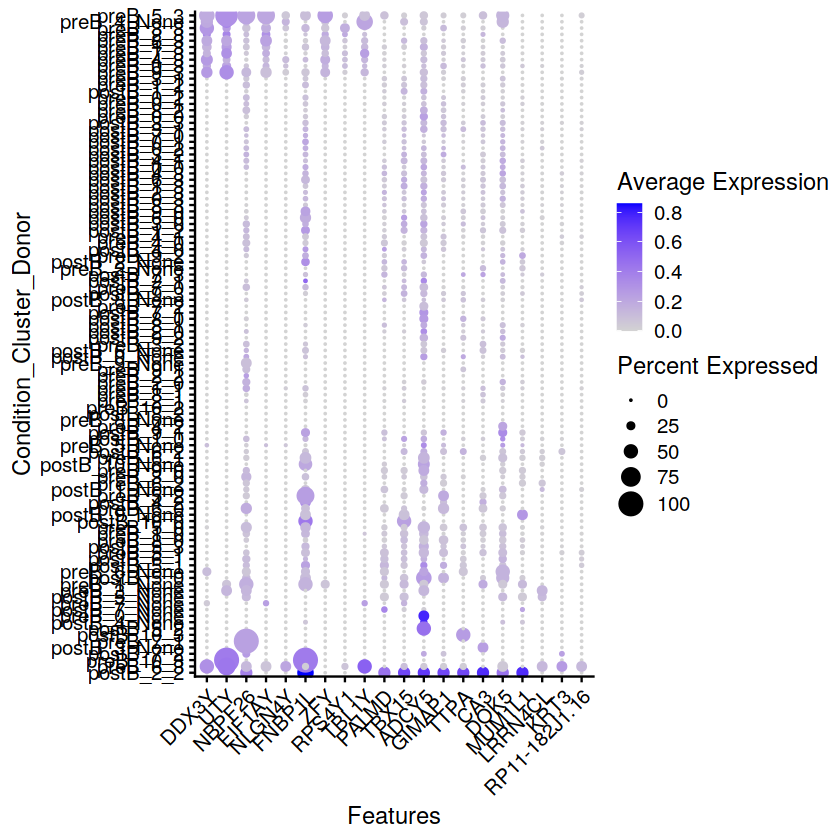

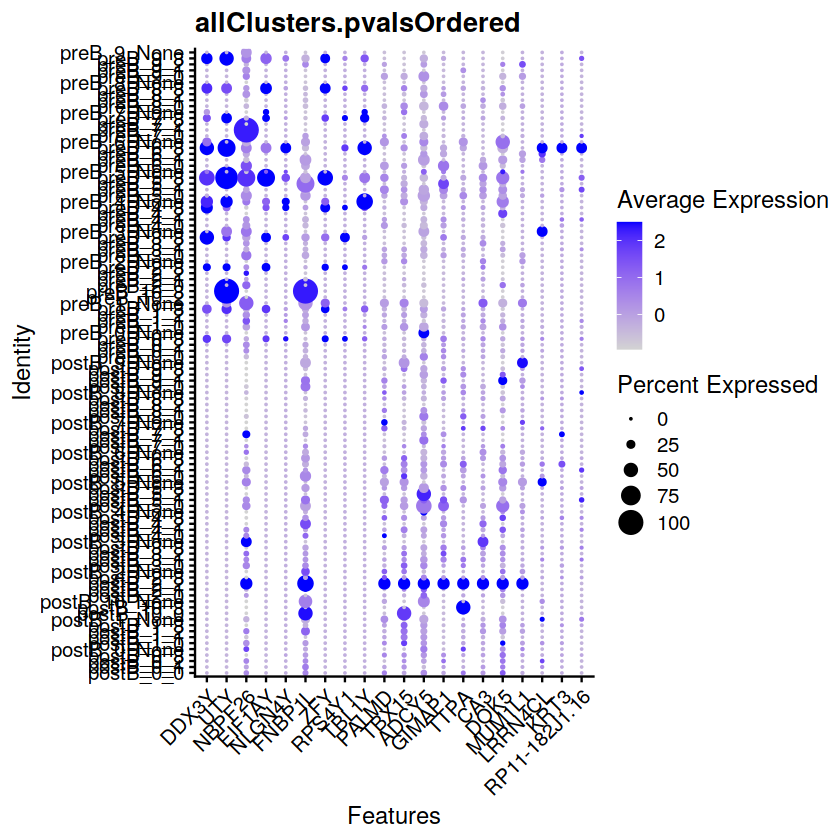

In [8]:
sig.all.ordered <- sort(rowMeans(-log10(all.pvals),na.rm=T), decreasing=T)
dot <- DotPlot(se, scale=FALSE,
               features = head(names(sig.all.ordered),20), 
               cluster.idents=T) + RotatedAxis() + ylab("Condition_Cluster_Donor")
dot

de.plots(se, names(sig.all.ordered), btwnConds_inClust_sepDonrs.outdir, 
         curr.name="allClusters.pvalsOrdered", max.size=20)

### Same features, but dont separate by donors

Saving 6.67 x 6.67 in image



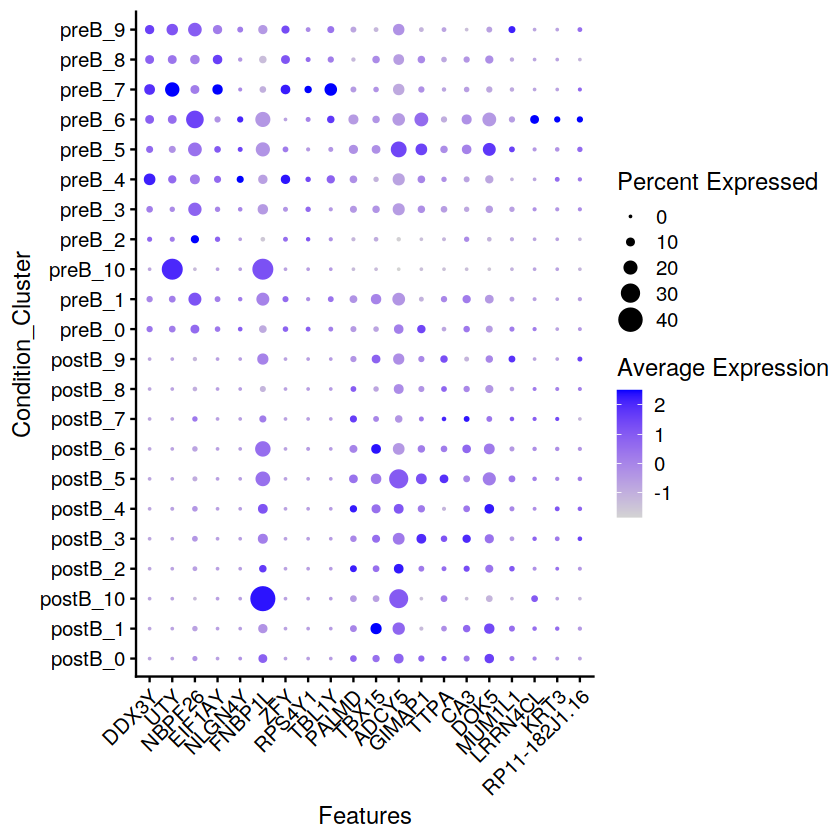

In [9]:
Idents(se)<-se$condition.clust
sig.all.ordered <- sort(rowMeans(-log10(all.pvals),na.rm=T), decreasing=T)
dot <- DotPlot(se, scale=T,
               features = head(names(sig.all.ordered),20), 
               cluster.idents=F) + RotatedAxis() + ylab("Condition_Cluster")
ggsave(file.path(btwnConds_inClust_sepDonrs.outdir, "allClusters.combineDonors.pvalsOrdered.png"))
dot

### Same features, but dont separate by donors or conditions

Saving 6.67 x 6.67 in image



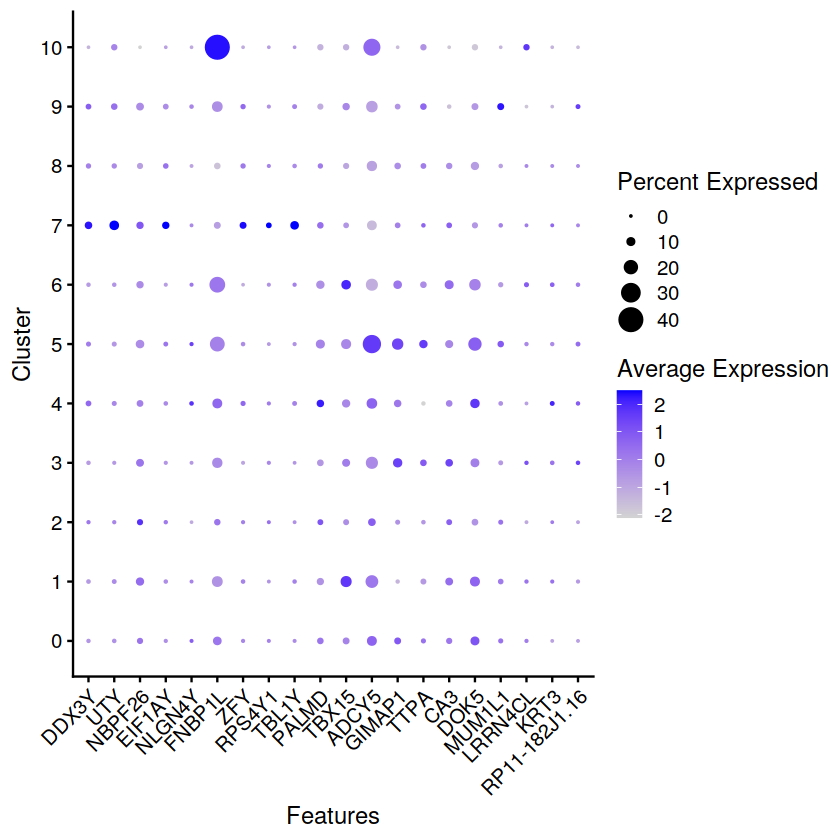

In [10]:
Idents(se)<-se$seurat_clusters
sig.all.ordered <- sort(rowMeans(-log10(all.pvals),na.rm=T), decreasing=T)
dot <- DotPlot(se, scale=T,
               features = head(names(sig.all.ordered),20), 
               cluster.idents=F) + RotatedAxis() + ylab("Cluster")
ggsave(file.path(btwnConds_inClust_sepDonrs.outdir,
                 "allClusters.combineDonorsConds.pvalsOrdered.png"))

dot

## ii. p-values ordered by average -log p-value if they were significant (p<0.1 here), set to 1 otherwise if not sig

Saving 6.67 x 6.67 in image



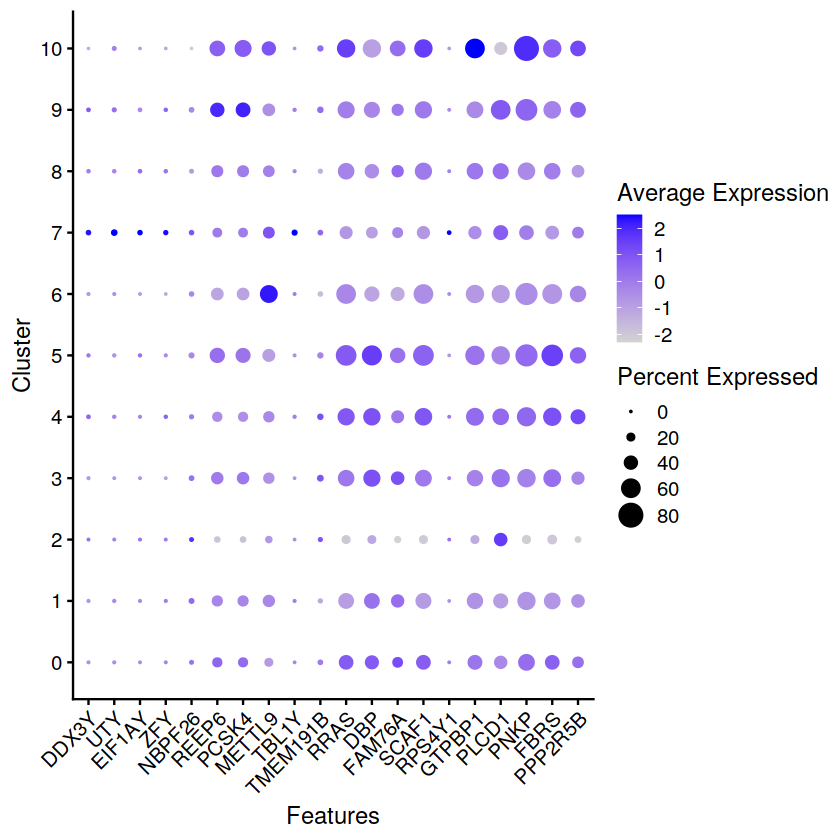

In [11]:
all.pvals.nafill <- all.pvals
all.pvals.nafill[,] <- -log10(zoo::na.fill(all.pvals,1))

Idents(se)<-se$seurat_clusters
sig.all.ordered <- sort(rowMeans(all.pvals.nafill), decreasing=T)
dot <- DotPlot(se, scale=T,
               features = head(names(sig.all.ordered),20), 
               cluster.idents=F) + RotatedAxis() + ylab("Cluster")
ggsave(file.path(btwnConds_inClust_sepDonrs.outdir,
                 "allClusters.combineDonorsConds.pvalsOrderedNA.png"))

dot

Saving 6.67 x 6.67 in image



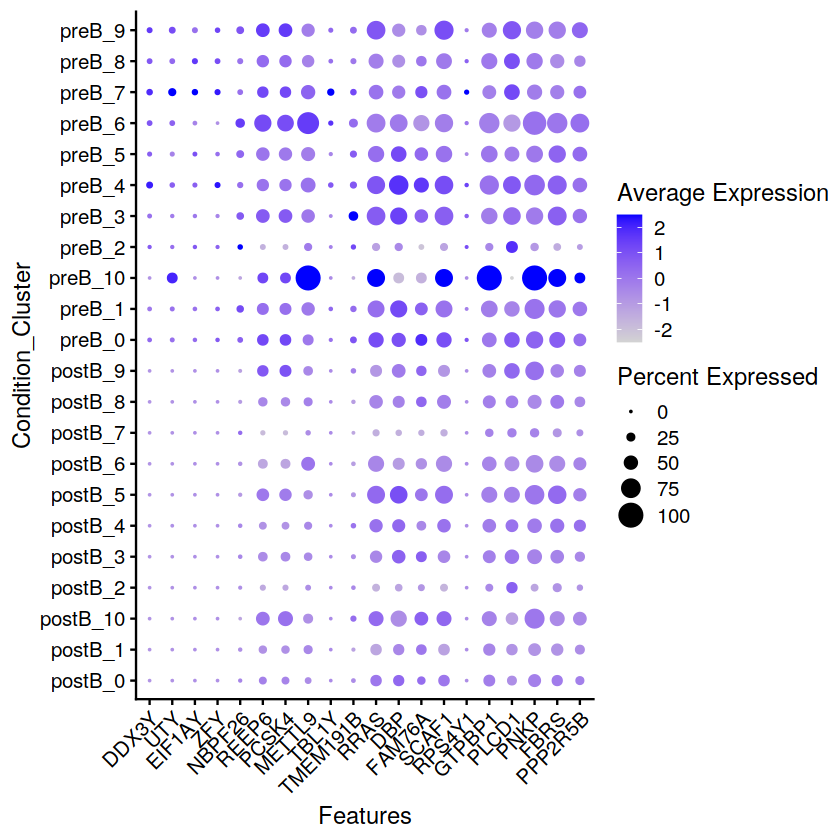

In [12]:
all.pvals.nafill <- all.pvals
all.pvals.nafill[,] <- -log10(zoo::na.fill(all.pvals,1))

Idents(se)<-se$condition.clust
sig.all.ordered <- sort(rowMeans(all.pvals.nafill), decreasing=T)
dot <- DotPlot(se, scale=T,
               features = head(names(sig.all.ordered),20), 
               cluster.idents=F) + RotatedAxis() + ylab("Condition_Cluster")
ggsave(file.path(btwnConds_inClust_sepDonrs.outdir,
                 "allClusters.combineDonors.pvalsOrderedNA.png"))

dot

## iii. Taking top 3 of each sig DE

The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



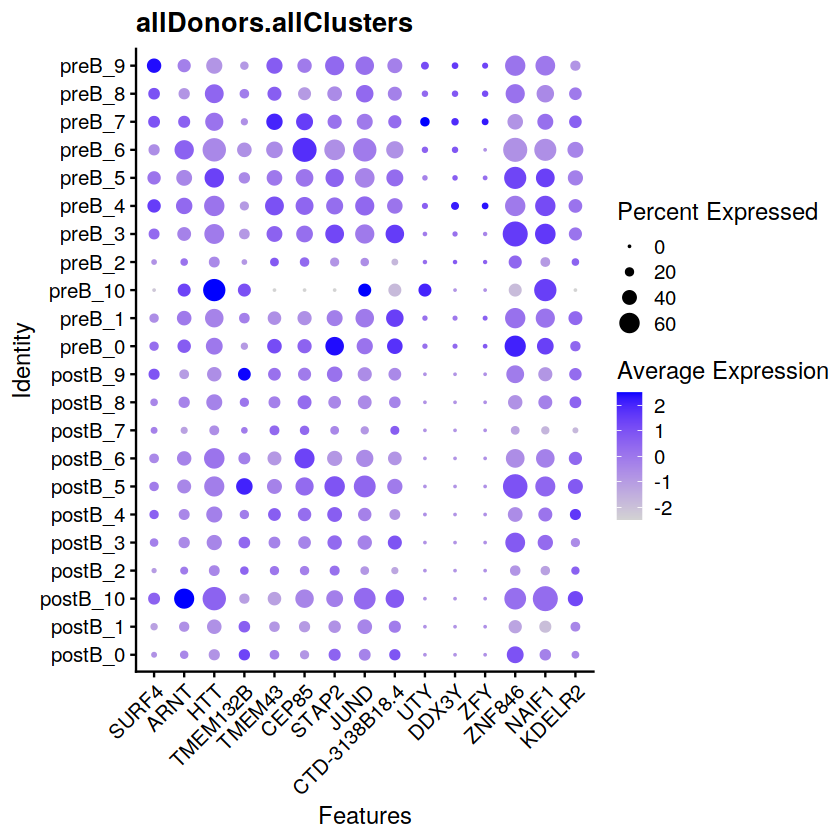

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



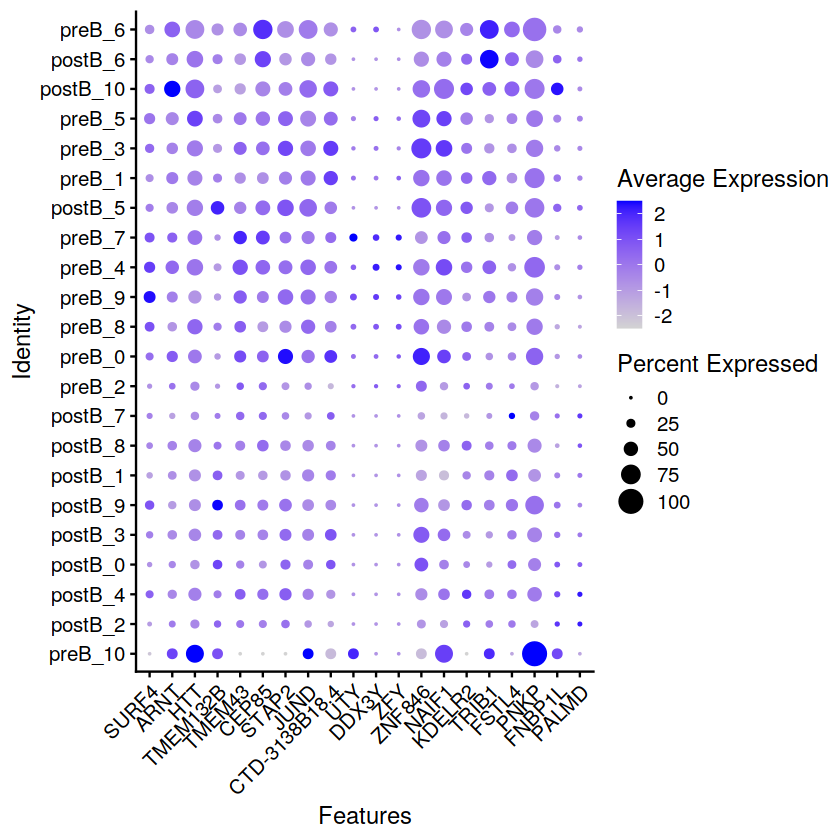

In [13]:
all.names.sig <- unique(all.names.sig)
de.plots(se, all.names.sig, btwnConds_inClust.outdir, curr.name="allDonors.allClusters", max.size=15)

dot <- DotPlot(se, scale=T,
               features = head(all.names.sig,20), 
               cluster.idents=T) + RotatedAxis()
dot
ggsave(file.path(btwnConds_inClust_sepDonrs.outdir, "allClusters.combineDonors.top3de.png"))
ggsave(file.path(btwnConds_inClust_sepDonrs.outdir, "allClusters.combineDonors.top3de.pdf"))

### a) For each cluster, get the top DEs by average across donors and plot by donor and condition
### b) Across all clusters, get the DE counts for each feature and cluster (sum over donors)
### b2) plot heatmap for features by clusters with the counts

In [14]:
counts.pvals <- data.frame(matrix(nrow=dim(se)[1],ncol=0),row.names=row.names(se))
all.pvals <- data.frame(matrix(nrow=dim(se)[1],ncol=0),
                          row.names=row.names(se))

In [15]:
source("/data/Mito_Trace/R_scripts/plot_de_over_all.R")

In [16]:
# get clust and donor information
source(utils_script)
clust.ids <- levels(se$seurat_clusters)
don.ids <- levels(se$donor)
#cols <- c("seurat_clusters", "donor")
curr.ids <- levels(as.factor(apply(se[[]][ , c( "seurat_clusters", "donor") ] , 1 , paste , collapse = "_" )))
# Setup Idents to include the condition, clusters and donor
Idents(se) <- as.factor(apply(se[[]][ , c("orig.ident", "seurat_clusters", "donor") ] , 1 , paste , collapse = "_" ))
se$curr.id = Idents(se)

# setup output
# all.pvals is gene-by-comparison df of the pvalue results
all.pvals <- data.frame(matrix(nrow=dim(se)[1],ncol=0),
                          row.names=row.names(se))
counts.pvals <- data.frame(matrix(nrow=dim(se)[1],ncol=0),row.names=row.names(se))
all.names.sig <- c()

# Loop through clusters and donors and compare between conditions
for (cl in clust.ids){
    print("cluster")
    print(cl)
    counts.pvals[ ,cl] = 0
    if (cl == "None"){
        next
    }
    
    clust.names.sig <- c()
    clust.pvals <- data.frame(matrix(nrow=dim(se)[1],ncol=0),
                              row.names=row.names(se))
    for (don in don.ids){
        if (don == "None"){
            print('Skipping None')
            next
        }
        c <- paste0(cl, "_", don)
        cl.names.sig = c()
        
        print("c")
        print(c)
        id1 <- paste(sample_names[[1]], c, sep="_")
        id2 <- paste(sample_names[[2]], c, sep="_")         
        curr.name <- c
        curr.name <- paste(c, sample_names[[1]], sample_names[[2]], sep='_')
        curr.clust.donor.outdir <- file.path(btwnConds_inClust_sepDonrs.outdir,
                                             paste0("clust_", cl, "donor_", don))
        de_f <- file.path(curr.clust.donor.outdir, paste(curr.name,"DE.csv",sep="_"))
        try({
            de <- read.table(de_f, row.names=1, sep=",", header=T )
            print(head(de))
            curr.sig <- de %>% dplyr::filter(p_val_adj_BH<p_thresh)
            if (length(names(curr.sig)) > 0){
                print("adding sig vals to all pvals")
                names.sig <- rownames(curr.sig)
                all.names.sig <- c(all.names.sig, head(names.sig, top_de))
                all.pvals[names.sig,curr.name] <- curr.sig$p_val_adj_BH

                clust.names.sig <- c(clust.names.sig, head(names.sig, top_de))
                clust.pvals[names.sig, don] <- curr.sig$p_val_adj_BH
                counts.pvals[names.sig, cl] = counts.pvals[names.sig, cl] +1 
            }
        })
    }
    try({
    if (cl != "None"){
        clust.outdir <- file.path(btwnConds_inClust_sepDonrs.outdir, paste0("clust_combineDonors", cl))
        dir.create(clust.outdir)
        se.filt <- subset(se, subset = seurat_clusters == cl & donor != "None")
        wrap.plot.over.all(se.filt, clust.outdir, clust.pvals, clust.names.sig, 
                           name=paste0("cluster",cl,"topDonorDE.split_donors"))
    }
        })
}

[1] "cluster"
[1] "0"
[1] "c"
[1] "0_0"
                      p_val  avg_diff pct.1 pct.2   p_val_adj p_val_adj_BH
SURF4          3.642600e-07 0.2015272 0.342 0.013 0.007130389 0.0007853446
ARNT           1.313807e-06 0.2736449 0.526 0.100 0.025717765 0.0012424015
HTT            1.728759e-06 0.3252658 0.737 0.212 0.033840457 0.0012424015
TNFAIP3        3.139112e-06 0.3596588 0.579 0.138 0.061448115 0.0016919813
DLG4           5.451018e-06 0.3730808 0.711 0.238 0.106703668 0.0021043938
CTD-3214H19.16 6.832447e-06 0.1183115 0.237 0.000 0.133745158 0.0021043938
[1] "adding sig vals to all pvals"
[1] "c"
[1] "0_1"
                p_val   avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
TMEM132B 4.700165e-08 -0.2667770 0.072 0.410 0.0009200573 6.509728e-05
TMEM43   1.357027e-05  0.2245357 0.454 0.141 0.2656380255 4.788431e-03
CEP85    1.744799e-05  0.2234908 0.464 0.154 0.3415444921 4.788431e-03
WDYHV1   1.820941e-05  0.2042229 0.433 0.128 0.3564492354 4.788431e-03
FOXO1    1.825242e-05  0.28

Warning message in dir.create(clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_combineDonors0' already exists"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.6

[1] "cluster"
[1] "1"
[1] "c"
[1] "1_0"
              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
ZNF846 1.578619e-09 0.3832246 0.818 0.212 3.090146e-05 3.330885e-06
NAIF1  3.192988e-08 0.2977476 0.745 0.173 6.250273e-04 3.368602e-05
KDELR2 1.872433e-07 0.2203881 0.600 0.077 3.665288e-03 1.316945e-04
SDCBP2 3.338844e-07 0.1989069 0.509 0.038 6.535788e-03 1.602350e-04
RBX1   3.797038e-07 0.2714338 0.691 0.154 7.432701e-03 1.602350e-04
P4HB   6.161821e-07 0.2521705 0.709 0.192 1.206177e-02 2.166907e-04
[1] "adding sig vals to all pvals"
[1] "c"
[1] "1_1"


Warning message in file(file, "rt"):
"cannot open file '/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_1donor_1/1_1_preB_postB_DE.csv': No such file or directory"


Error in file(file, "rt") : cannot open the connection
[1] "c"
[1] "1_2"
                    p_val   avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
TRIB1        1.876446e-06  0.3388729 0.600  0.04 0.03673143  0.005282195
FSTL4        1.811681e-05 -0.4306264 0.238  0.64 0.35463657  0.016655015
PNKP         2.046687e-05  0.4150863 0.800  0.28 0.40063902  0.016655015
NTRK3        2.835478e-05 -0.3213238 0.100  0.44 0.55504488  0.016655015
GCSH         2.964537e-05  0.2555374 0.512  0.04 0.58030814  0.016655015
RP11-792A8.5 4.242134e-05  0.4556436 0.863  0.40 0.83039782  0.016655015
[1] "adding sig vals to all pvals"
[1] "c"
[1] "1_3"
                p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
UTY      3.847703e-20 0.1928994 0.300 0.000 7.531879e-16 4.290189e-17
DDX3Y    1.544532e-18 0.1199949 0.275 0.000 3.023422e-14 8.610768e-16
ZFY      2.350593e-15 0.1091274 0.225 0.000 4.601287e-11 6.552279e-13
EIF1AY   2.350593e-15 0.1091315 0.225 0.000 4.601287e-11 6.552279e-13
TMEM191B 9.62

Warning message in dir.create(clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_combineDonors1' already exists"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.6

[1] "cluster"
[1] "2"
[1] "c"
[1] "2_0"


Warning message in file(file, "rt"):
"cannot open file '/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_2donor_0/2_0_preB_postB_DE.csv': No such file or directory"


Error in file(file, "rt") : cannot open the connection
[1] "c"
[1] "2_1"
              p_val  avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
MT-ND5 5.617103e-07 0.4798536     1     1 0.01100278 0.0007044376
MT-CYB 8.243857e-07 0.4825941     1     1 0.01614807 0.0007044376
MT-ND6 2.880833e-06 0.4542306     1     1 0.05642976 0.0014381927
MT-ND4 3.998282e-06 0.4362863     1     1 0.07831835 0.0014381927
MT-ND2 5.016294e-06 0.4476174     1     1 0.09825918 0.0014381927
MT-ND1 5.524773e-06 0.4387487     1     1 0.10821925 0.0014381927
[1] "adding sig vals to all pvals"
[1] "c"
[1] "2_2"
              p_val   avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
FNBP1L 1.614991e-14 -0.6704635     0   0.6 3.161344e-10 9.510680e-11
PALMD  4.740623e-10 -0.3507792     0   0.4 9.279770e-06 2.537957e-07
TBX15  4.740623e-10 -0.4488564     0   0.4 9.279770e-06 2.537957e-07
ADCY5  4.740623e-10 -0.4794076     0   0.4 9.279770e-06 2.537957e-07
GIMAP1 4.740623e-10 -0.4682976     0   0.4 9.279770e-06 2.537957e-0

Warning message in dir.create(clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_combineDonors2' already exists"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message in FetchData(object = object, vars = features, cells = cells):
"The following requested variables were not found: MT-ND5, MT-CYB, MT-ND6"
Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: MT-ND5, MT-CYB, MT-ND6"
Warning message in FetchData(object = object, vars = features, slot = slot):
"The following requested variables were not found: MT-ND5, MT-CYB, MT-ND6"


Error in h(simpleError(msg, call)) : 
  error in evaluating the argument 'x' in selecting a method for function 'as.matrix': invalid character indexing
[1] "cluster"
[1] "3"
[1] "c"
[1] "3_0"
                      p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
KLF2           1.316182e-05 0.2761289 0.636 0.103 0.2576427   0.01475002
COQ7           1.492469e-05 0.2647021 0.636 0.069 0.2921509   0.01475002
ZNF575         1.972493e-05 0.3159245 0.788 0.172 0.3861155   0.01475002
HMHA1          2.488338e-05 0.3134270 0.636 0.069 0.4870921   0.01475002
RP11-216L13.17 3.576245e-05 0.3392124 0.727 0.172 0.7000500   0.01475002
RBM14          4.220438e-05 0.2619434 0.727 0.172 0.8261507   0.01475002
[1] "adding sig vals to all pvals"
[1] "c"
[1] "3_1"
                p_val  avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
KAT7     1.483174e-06 0.3125969 0.617  0.14 0.02903312  0.001956189
HMOX2    2.047294e-06 0.3096994 0.533  0.10 0.04007577  0.001956189
DNAJB1   6.758990e-06 0.3792589 0.783  0

Warning message in file(file, "rt"):
"cannot open file '/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_3donor_2/3_2_preB_postB_DE.csv': No such file or directory"


Error in file(file, "rt") : cannot open the connection
[1] "c"
[1] "3_3"
              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
DDX3Y  7.984697e-31 0.2414640 0.500 0.000 1.563005e-26 2.036098e-27
RPS4Y1 4.152506e-18 0.1359812 0.286 0.000 8.128531e-14 3.529630e-15
EIF1AY 4.152506e-18 0.1371601 0.286 0.000 8.128531e-14 3.529630e-15
UTY    6.566188e-14 0.1640451 0.214 0.000 1.285331e-09 4.185945e-11
SCIMP  5.530058e-08 0.1885138 0.286 0.019 1.082509e-03 2.820330e-05
CHADL  8.936277e-08 0.1647581 0.429 0.050 1.749276e-03 3.797918e-05
[1] "adding sig vals to all pvals"
[1] "Skipping None"


Warning message in dir.create(clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_combineDonors3' already exists"
Saving 8 x 8 in image

Saving 8 x 8 in image

Saving 8 x 8 in image

Saving 8 x 8 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster"
[1] "4"
[1] "c"
[1] "4_0"
                    p_val  avg_diff pct.1 pct.2   p_val_adj p_val_adj_BH
FUNDC2       2.369535e-07 0.2667435  0.68 0.054 0.004638365 0.0007518535
CTLA4        2.690392e-06 0.3372537  0.64 0.081 0.052664415 0.0024444933
INTS9        3.187853e-06 0.3778322  0.88 0.216 0.062402232 0.0024444933
RP11-371E8.4 3.228405e-06 0.3240090  0.60 0.054 0.063196021 0.0024444933
SNN          3.852022e-06 0.2277779  0.60 0.054 0.075403336 0.0024444933
HS1BP3       5.462836e-06 0.2708746  0.60 0.054 0.106935007 0.0024762253
[1] "adding sig vals to all pvals"
[1] "c"
[1] "4_1"
                  p_val  avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
CRTC2      3.729773e-07 0.3247969 0.593 0.043 0.00730103 0.0009566867
TDRD7      6.182211e-06 0.2626863 0.519 0.065 0.12101679 0.0079286861
AC003002.4 2.064449e-05 0.2743517 0.519 0.065 0.40411585 0.0176510371
BCAT2      5.878101e-05 0.2357219 0.407 0.043 1.00000000 0.0334932483
TMEM52     7.480458e-05 0.3199057 0.630 0.152 

Warning message in file(file, "rt"):
"cannot open file '/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_4donor_2/4_2_preB_postB_DE.csv': No such file or directory"


Error in file(file, "rt") : cannot open the connection
[1] "c"
[1] "4_3"
              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
DDX3Y  1.396022e-16 0.2162360 0.387 0.000 2.732713e-12 2.109389e-13
ZFY    1.233073e-12 0.1450377 0.290 0.000 2.413741e-08 9.315870e-10
UTY    2.428733e-07 0.1140950 0.194 0.006 4.754245e-03 1.223272e-04
ERCC2  1.242147e-06 0.2355789 0.452 0.108 2.431502e-02 4.692210e-04
CALR   9.141341e-06 0.2348650 0.581 0.210 1.789418e-01 2.509635e-03
TOM1L2 1.100177e-05 0.3525695 0.806 0.443 2.153596e-01 2.509635e-03
[1] "adding sig vals to all pvals"
[1] "Skipping None"


Warning message in dir.create(clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_combineDonors4' already exists"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster"
[1] "5"
[1] "c"
[1] "5_0"
              p_val   avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
ZNF562 7.848746e-07 -0.2940949 0.031 0.778 0.01536392  0.002775317
FBXO9  1.115020e-04 -0.3935765 0.656 1.000 1.00000000  0.154145333
TSTD3  2.551846e-04 -0.2395706 0.125 0.667 1.00000000  0.154145333
NARS2  2.758004e-04  0.2673561 0.781 0.000 1.00000000  0.154145333
HENMT1 4.194600e-04 -0.3060633 0.281 0.778 1.00000000  0.154145333
NLK    5.369476e-04 -0.3182684 0.750 1.000 1.00000000  0.154145333
[1] "adding sig vals to all pvals"
[1] "c"
[1] "5_1"


Warning message in file(file, "rt"):
"cannot open file '/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_5donor_1/5_1_preB_postB_DE.csv': No such file or directory"


Error in file(file, "rt") : cannot open the connection
[1] "c"
[1] "5_2"


Warning message in file(file, "rt"):
"cannot open file '/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_5donor_2/5_2_preB_postB_DE.csv': No such file or directory"


Error in file(file, "rt") : cannot open the connection
[1] "c"
[1] "5_3"
              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
UTY    3.341165e-36 0.3000098 0.889 0.000 6.540331e-32 7.631222e-33
NBPF26 2.865207e-27 0.2015371 0.667 0.000 5.608644e-23 2.181378e-24
EIF1AY 2.865207e-27 0.1924840 0.667 0.000 5.608644e-23 2.181378e-24
ZFY    7.219875e-23 0.2132332 0.556 0.000 1.413291e-18 3.298039e-20
DDX3Y  7.219875e-23 0.1682126 0.556 0.000 1.413291e-18 3.298039e-20
SOX8   7.325404e-09 0.1084464 0.556 0.041 1.433948e-04 2.788537e-06
[1] "adding sig vals to all pvals"
[1] "Skipping None"


Warning message in dir.create(clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_combineDonors5' already exists"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster"
[1] "6"
[1] "c"
[1] "6_0"
              p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
COPZ1  4.597928e-05 0.3500054 0.882 0.176 0.9000444   0.05840623
IER2   5.893320e-05 0.4258242 0.941 0.235 1.0000000   0.05840623
ARL10  7.008285e-05 0.3260971 0.882 0.118 1.0000000   0.05840623
GOLIM4 7.055419e-05 0.3175768 0.765 0.059 1.0000000   0.05840623
ANXA6  8.634865e-05 0.4046351 0.941 0.176 1.0000000   0.05840623
USB1   1.161341e-04 0.2712770 0.647 0.000 1.0000000   0.06546093
[1] "adding sig vals to all pvals"
[1] "c"
[1] "6_1"


Warning message in file(file, "rt"):
"cannot open file '/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_6donor_1/6_1_preB_postB_DE.csv': No such file or directory"


Error in file(file, "rt") : cannot open the connection
[1] "c"
[1] "6_2"


Warning message in file(file, "rt"):
"cannot open file '/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_6donor_2/6_2_preB_postB_DE.csv': No such file or directory"


Error in file(file, "rt") : cannot open the connection
[1] "c"
[1] "6_3"
              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
UTY    7.658983e-28 0.3733369 0.667 0.000 1.499246e-23 2.843781e-24
TBL1Y  3.679498e-21 0.3519699 0.500 0.000 7.202617e-17 4.553992e-18
DDX3Y  3.679498e-21 0.2596892 0.500 0.000 7.202617e-17 4.553992e-18
PLN    1.585168e-14 0.1032412 0.333 0.000 3.102967e-10 1.177146e-11
NLGN4Y 1.585168e-14 0.1588625 0.333 0.000 3.102967e-10 1.177146e-11
KRT3   5.065863e-10 0.2077975 0.333 0.006 9.916428e-06 2.948420e-07
[1] "adding sig vals to all pvals"
[1] "Skipping None"


Warning message in dir.create(clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_combineDonors6' already exists"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster"
[1] "7"
[1] "c"
[1] "7_0"
               p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
PPP1R11 8.068964e-09 0.3645322 0.538 0.019 0.0001579500 2.824944e-05
CXXC1   2.729602e-08 0.4054555 0.692 0.094 0.0005343197 3.128653e-05
RAPGEF1 4.266662e-08 0.6995101 0.846 0.189 0.0008351990 3.128653e-05
MBOAT7  4.468227e-08 0.5221851 0.718 0.113 0.0008746555 3.128653e-05
TSEN34  4.468227e-08 0.5221851 0.718 0.113 0.0008746555 3.128653e-05
COPS7B  5.376417e-08 0.3056991 0.513 0.019 0.0010524337 3.137139e-05
[1] "adding sig vals to all pvals"
[1] "c"
[1] "7_1"


Warning message in file(file, "rt"):
"cannot open file '/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_7donor_1/7_1_preB_postB_DE.csv': No such file or directory"


Error in file(file, "rt") : cannot open the connection
[1] "c"
[1] "7_2"


Warning message in file(file, "rt"):
"cannot open file '/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_7donor_2/7_2_preB_postB_DE.csv': No such file or directory"


Error in file(file, "rt") : cannot open the connection
[1] "c"
[1] "7_3"
               p_val   avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
METTL9  8.871789e-07  0.3697414 0.551 0.075 0.01736653  0.001751291
KLHL13  3.989139e-06 -0.1933409 0.000 0.225 0.07808740  0.002592142
EFNA5   4.755890e-06  0.5283148 0.876 0.400 0.09309654  0.002592142
B4GALT1 5.252567e-06  0.4686270 0.719 0.275 0.10281900  0.002592142
PUS10   7.988381e-06  0.3139141 0.494 0.075 0.15637255  0.003153813
RRAGD   2.375387e-05  0.2865194 0.416 0.050 0.46498197  0.007815023
[1] "adding sig vals to all pvals"
[1] "Skipping None"


Warning message in dir.create(clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_combineDonors7' already exists"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
W

[1] "cluster"
[1] "8"
[1] "c"
[1] "8_0"
              p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
ZC3H7A 5.977887e-06 0.3804201 0.909 0.000 0.1170171   0.01829176
STK4   1.968758e-05 0.5786294 0.909 0.062 0.3853844   0.01829176
TAGLN2 2.617147e-05 0.2739782 0.818 0.000 0.5123066   0.01829176
CLCN2  2.617147e-05 0.3604276 0.818 0.000 0.5123066   0.01829176
ZNF184 2.617147e-05 0.2284594 0.818 0.000 0.5123066   0.01829176
TAP1   2.617147e-05 0.4004268 0.818 0.000 0.5123066   0.01829176
[1] "adding sig vals to all pvals"
[1] "c"
[1] "8_1"
               p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
CDC73   3.236259e-05 -0.5740371 0.091 0.704 0.6339184   0.08954114
MT-ND1  7.190299e-05  0.6082646 1.000 1.000 1.0000000   0.08954114
MT-ND4  1.091055e-04  0.5672307 1.000 1.000 1.0000000   0.08954114
MT-ND4L 1.184584e-04  0.5563687 1.000 1.000 1.0000000   0.08954114
MT-ND2  1.512594e-04  0.5655695 1.000 1.000 1.0000000   0.08954114
MT-ATP6 1.776890e-04  0.5414183 1.000 1.000 1.0000

Warning message in file(file, "rt"):
"cannot open file '/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_8donor_2/8_2_preB_postB_DE.csv': No such file or directory"


Error in file(file, "rt") : cannot open the connection
[1] "c"
[1] "8_3"
              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
EIF1AY 6.728579e-11 0.1781584 0.375 0.000 1.317119e-06 1.167408e-07
ZFY    8.866645e-10 0.1124867 0.333 0.000 1.735646e-05 3.845907e-07
DDX3Y  8.866645e-10 0.1468692 0.333 0.000 1.735646e-05 3.845907e-07
UTY    8.866645e-10 0.1576342 0.333 0.000 1.735646e-05 3.845907e-07
PSAPL1 1.910731e-06 0.1624451 0.292 0.019 3.740255e-02 6.630235e-04
PSCA   7.175139e-06 0.1145985 0.333 0.037 1.404534e-01 2.074811e-03
[1] "adding sig vals to all pvals"
[1] "Skipping None"


Warning message in dir.create(clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_combineDonors8' already exists"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message in FetchData(object = object, vars = features, cells = cells):
"The following requested variables were not found: MT-ND1, MT-ND4"
Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: MT-ND1, MT-ND4"
Warning message in FetchData(object = object, vars = features, slot = slot):
"The following requested variables were not found: MT-ND1, MT-ND4"


Error in h(simpleError(msg, call)) : 
  error in evaluating the argument 'x' in selecting a method for function 'as.matrix': invalid character indexing
[1] "cluster"
[1] "9"
[1] "c"
[1] "9_0"
                    p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
RP5-931K24.3 7.663147e-06 0.3254989 0.833 0.000 0.1500061   0.03501026
NT5DC3       7.315631e-05 0.4154403 0.833 0.048 1.0000000   0.03501026
N4BP2L2      8.272888e-05 0.4685151 1.000 0.095 1.0000000   0.03501026
PFDN2        9.036217e-05 0.2702944 0.667 0.000 1.0000000   0.03501026
NIT1         9.036217e-05 0.2702944 0.667 0.000 1.0000000   0.03501026
KHK          9.036217e-05 0.2209545 0.667 0.000 1.0000000   0.03501026
[1] "adding sig vals to all pvals"
[1] "c"
[1] "9_1"


Warning message in file(file, "rt"):
"cannot open file '/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_9donor_1/9_1_preB_postB_DE.csv': No such file or directory"


Error in file(file, "rt") : cannot open the connection
[1] "c"
[1] "9_2"


Warning message in file(file, "rt"):
"cannot open file '/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_9donor_2/9_2_preB_postB_DE.csv': No such file or directory"


Error in file(file, "rt") : cannot open the connection
[1] "c"
[1] "9_3"
                p_val  avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
UTY      1.403671e-06 0.2672691 0.500 0.000 0.02747686  0.003820792
MTERFD3  2.350534e-05 0.1400179 0.500 0.024 0.46011698  0.021108082
FAM86C1  3.270492e-05 0.3952126 0.929 0.262 0.64019880  0.021108082
KIAA0430 5.107128e-05 0.2404194 0.571 0.071 0.99972031  0.021108082
E2F2     6.408221e-05 0.1332250 0.357 0.000 1.00000000  0.021108082
GZMB     6.408221e-05 0.1460005 0.357 0.000 1.00000000  0.021108082
[1] "adding sig vals to all pvals"
[1] "Skipping None"


Warning message in dir.create(clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_combineDonors9' already exists"
Saving 8 x 8 in image

Saving 8 x 8 in image

Saving 8 x 8 in image

Saving 8 x 8 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster"
[1] "10"
[1] "c"
[1] "10_0"


Warning message in file(file, "rt"):
"cannot open file '/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_10donor_0/10_0_preB_postB_DE.csv': No such file or directory"


Error in file(file, "rt") : cannot open the connection
[1] "c"
[1] "10_1"


Warning message in file(file, "rt"):
"cannot open file '/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_10donor_1/10_1_preB_postB_DE.csv': No such file or directory"


Error in file(file, "rt") : cannot open the connection
[1] "c"
[1] "10_2"


Warning message in file(file, "rt"):
"cannot open file '/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_10donor_2/10_2_preB_postB_DE.csv': No such file or directory"


Error in file(file, "rt") : cannot open the connection
[1] "c"
[1] "10_3"


Warning message in file(file, "rt"):
"cannot open file '/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_10donor_3/10_3_preB_postB_DE.csv': No such file or directory"


Error in file(file, "rt") : cannot open the connection
[1] "Skipping None"


Warning message in dir.create(clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust_sepDonrs/clust_combineDonors10' already exists"


Error in FetchData(object = object, vars = features, cells = cells) : 
  None of the requested variables were found: 


In [17]:
counts.pvals <- counts.pvals[(!rowSums(counts.pvals) == 0), ]

write.csv(counts.pvals,file.path(btwnConds_inClust_sepDonrs.outdir, "allClusters.sharedDE.csv"))


In [28]:
counts.pvals <- na.omit(counts.pvals)

In [29]:
library(circlize)
col_fun = colorRamp2(c(0, max(counts.pvals)), c("white", "blue"))
col_fun(seq(0 , max(counts.pvals)))

pdf(file.path(btwnConds_inClust_sepDonrs.outdir, "allClusters.sharedDE.png"))

heat <- ComplexHeatmap::Heatmap(head(counts.pvals,15),
        show_column_names = T, use_raster=TRUE, col=col_fun
       )
ComplexHeatmap::draw(heat)
dev.off()


[1] "#FFFFFFFF" "#CFB1FFFF" "#9265FFFF" "#0000FFFF"

Warning message:
"The input is a data frame, convert it to a matrix."


png 
  2

In [ ]:
# Get commone DE values
# tfs_nclust_set_de_overlap = c() # for each tf count number of clusters seen with de results in at least 1 donor
# tfs_clust_de = c()

# clust_dirs = glob.glob(cond_indir+"/clust_*")
# clusters = [basename(x).split("_")[-1] for x in clust_dirs]
# #clusters.sort()

# for i in clust_dirs:
#     print("clusert", i)
#     clust = basename(i).split("_")[-1]
    
#     for d in range(n_donors):
#         print("donor", d)
#         curr_dir = join(i, f"donor{d}")
#         curr_f = glob.glob(join(curr_dir, "*DE.csv"))
#         assert(len(curr_f)<=1)
#         if len(curr_f) == 0:
#             print("no file")
#             continue
#         curr_f = curr_f[0]
#         curr_de = pd.read_csv(curr_f,index_col=0)
#         #print('curr_de', curr_de.shape)
#         curr_de = curr_de.loc[curr_de["p_val_adj_BH"] < p_thresh]
#         for tf in curr_de.index:
#             if tf in tfs_nclust_set_de_overlap.keys():
#                 tfs_nclust_set_de_overlap[tf].add(clust)
#                     #tfs_nclust_de_overlap[tf] += 1
#                 tfs_clust_de[tf].append((clust, d))
#             else:
#                 #tfs_nclust_de_overlap[tf] = 1
#                 tfs_nclust_set_de_overlap[tf] = set([clust])
#                 tfs_clust_de[tf] = [(clust,d)]
#         print('curr_de sig', curr_de.shape)

# tfs_nclust_de_overlap = {k:len(v) for k, v in tfs_nclust_set_de_overlap.items()}
# tfs_nclust_de_overlap = pd.Series(tfs_nclust_de_overlap).sort_values()[::-1]
# cluster_tf = pd.DataFrame(index=tfs_clust_de.keys(), columns = clusters)
# cluster_tf.loc[:,:] = 0


# for tf in tfs_clust_de:
#     for d_cl in tfs_clust_de[tf]:
#         cluster_tf.loc[tf, d_cl[0]] += 1
# cluster_tf

# cluster_tf = cluster_tf.loc[cluster_tf.sum(axis=1).sort_values()[::-1].index,
#                             cluster_tf.sum(axis=0).sort_values()[::-1].index ]
# cluster_tf
#g = sns.clustermap(cluster_tf.astype(int))

--------

## Stimulus specific response in each cluster, not splitting donors

In [30]:

source(utils_script)

all.pvals <- data.frame(matrix(nrow=dim(se)[1],ncol=0),
                          row.names=row.names(se))
all.names.sig <- c()

#sample_names
cluster.ids <- sort(unique(se$seurat_clusters))
se$celltype.stim <- paste(se$seurat_clusters, se$orig.ident, sep = "_")
se$celltype <- se$seurat_clusters
Idents(se) <- "celltype.stim"

for (curr.clust in cluster.ids){
    ident.1 = paste0(curr.clust, "_", sample_names[[1]]) 
    ident.2 = paste0(curr.clust, "_", sample_names[[2]])
    try({
        print(curr.clust)
        #se.filt <- subset(se, idents = c(ident.1,ident.2))
        #curr.donor = se.filt$donor[[1]] #strsplit(c,"_")[[2]]
        curr.name <-paste0("clust_", curr.clust)
        curr.clust.outdir <- file.path(btwnConds_inClust.outdir, paste0("clust_", curr.clust))
        dir.create(curr.clust.outdir)

        curr.sig <- find.markers.and.plot(se, ident.1, ident.2, curr.clust.outdir, curr.name=curr.clust, 
                              min.pct=minPct, p.thresh=p_thresh)
        names.sig <- rownames(curr.sig)
        all.names.sig <- c(all.names.sig, head(names.sig, top_de))
        
        all.pvals[names.sig,curr.clust] <- curr.sig$p_val_adj_BH

        curr_clust <- subset(se, seurat_clusters == curr.clust)
        avg_curr_clust <- data.frame(log1p(AverageExpression(curr_clust, verbose = FALSE)$RNA))
        avg_curr_clust$gene <- rownames(avg_curr_clust)
        p1 <- ggplot(avg_curr_clust, aes_string(paste0("X", c, "_", sample_names[[1]]), 
                                                paste0("X", c, "_", sample_names[[2]]))) + geom_point() + ggtitle(paste("Cluster", curr.clust))
        p1 <- LabelPoints(plot = p1, points = names.sig, repel = TRUE)
        plot_grid(p1)
        #write.csv(response, file=file.path(curr.clust.outdir,paste0("cluster_",c,".conditionDE.csv")))
        ggsave(file.path(curr.clust.outdir,paste0("cluster_",curr.clust,".allDonors.conditionScatter.png")))
        
        })
    }
     



[1] "0"


Warning message in dir.create(curr.clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust/clust_0' already exists"


[1] "curr sig"
                    p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
BRD7         4.507988e-12 0.1717904 0.395 0.160 8.824387e-08 2.817493e-09
NCF1         7.059977e-11 0.1070188 0.269 0.089 1.381990e-06 2.203125e-08
RP13-582O9.6 1.057500e-10 0.1410882 0.381 0.160 2.070056e-06 2.203125e-08
ERV3-1       4.022680e-10 0.1256092 0.323 0.125 7.874396e-06 6.285437e-08
MAD2L1BP     5.524994e-10 0.1417508 0.426 0.198 1.081518e-05 6.906243e-08
C2orf44      6.725512e-10 0.1244209 0.408 0.175 1.316519e-05 7.005741e-08
[1] "dim response"
[1] 625   6
[1] "response plots"
                    p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
BRD7         4.507988e-12 0.1717904 0.395 0.160 8.824387e-08 2.817493e-09
NCF1         7.059977e-11 0.1070188 0.269 0.089 1.381990e-06 2.203125e-08
RP13-582O9.6 1.057500e-10 0.1410882 0.381 0.160 2.070056e-06 2.203125e-08
ERV3-1       4.022680e-10 0.1256092 0.323 0.125 7.874396e-06 6.285437e-08
MAD2L1BP     5.524994e-10 0.1417508 0.426 0.1

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



                    p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
BRD7         4.507988e-12 0.1717904 0.395 0.160 8.824387e-08 2.817493e-09
NCF1         7.059977e-11 0.1070188 0.269 0.089 1.381990e-06 2.203125e-08
RP13-582O9.6 1.057500e-10 0.1410882 0.381 0.160 2.070056e-06 2.203125e-08
ERV3-1       4.022680e-10 0.1256092 0.323 0.125 7.874396e-06 6.285437e-08
MAD2L1BP     5.524994e-10 0.1417508 0.426 0.198 1.081518e-05 6.906243e-08
C2orf44      6.725512e-10 0.1244209 0.408 0.175 1.316519e-05 7.005741e-08


Saving 6.67 x 6.67 in image

When using repel, set xnudge and ynudge to 0 for optimal results



Error in FUN(X[[i]], ...) : object 'X10_3_preB' not found
[1] "1"


Warning message in dir.create(curr.clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust/clust_1' already exists"


[1] "curr sig"
                p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
PNKP     1.307071e-13 0.2511987 0.766 0.425 2.558591e-09 5.528229e-11
POLD1    1.963847e-13 0.1694399 0.546 0.243 3.844230e-09 5.528229e-11
HLA-DPA1 9.630981e-13 0.1807579 0.573 0.256 1.885265e-08 1.807414e-10
AKT1S1   1.777077e-12 0.2104660 0.720 0.386 3.478628e-08 2.501236e-10
ST20     3.767882e-12 0.1334154 0.495 0.197 7.375629e-08 4.242635e-10
SHBG     7.886258e-12 0.1596454 0.537 0.253 1.543735e-07 7.399939e-10
[1] "dim response"
[1] 563   6
[1] "response plots"
                p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
PNKP     1.307071e-13 0.2511987 0.766 0.425 2.558591e-09 5.528229e-11
POLD1    1.963847e-13 0.1694399 0.546 0.243 3.844230e-09 5.528229e-11
HLA-DPA1 9.630981e-13 0.1807579 0.573 0.256 1.885265e-08 1.807414e-10
AKT1S1   1.777077e-12 0.2104660 0.720 0.386 3.478628e-08 2.501236e-10
ST20     3.767882e-12 0.1334154 0.495 0.197 7.375629e-08 4.242635e-10
SHBG     7.886258e-12 0

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



                p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
PNKP     1.307071e-13 0.2511987 0.766 0.425 2.558591e-09 5.528229e-11
POLD1    1.963847e-13 0.1694399 0.546 0.243 3.844230e-09 5.528229e-11
HLA-DPA1 9.630981e-13 0.1807579 0.573 0.256 1.885265e-08 1.807414e-10
AKT1S1   1.777077e-12 0.2104660 0.720 0.386 3.478628e-08 2.501236e-10
ST20     3.767882e-12 0.1334154 0.495 0.197 7.375629e-08 4.242635e-10
SHBG     7.886258e-12 0.1596454 0.537 0.253 1.543735e-07 7.399939e-10


Saving 6.67 x 6.67 in image

When using repel, set xnudge and ynudge to 0 for optimal results



Error in FUN(X[[i]], ...) : object 'X10_3_preB' not found
[1] "2"


Warning message in dir.create(curr.clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust/clust_2' already exists"


[1] "curr sig"
              p_val   avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
PID1   2.574146e-09 -0.2166200 0.072 0.276 5.038891e-05 9.975119e-07
TRDN   5.037939e-09 -0.2165339 0.090 0.299 9.861766e-05 9.975119e-07
FBXL7  2.591667e-08 -0.1729509 0.045 0.214 5.073188e-04 3.421000e-06
PLXDC2 4.834154e-08 -0.1893539 0.072 0.249 9.462856e-04 4.785812e-06
ASTN1  7.526695e-08 -0.1580178 0.036 0.194 1.473351e-03 5.961142e-06
CACNB2 9.032097e-08 -0.1947851 0.090 0.270 1.768033e-03 5.961184e-06
[1] "dim response"
[1] 396   6
[1] "response plots"
              p_val   avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
PID1   2.574146e-09 -0.2166200 0.072 0.276 5.038891e-05 9.975119e-07
TRDN   5.037939e-09 -0.2165339 0.090 0.299 9.861766e-05 9.975119e-07
FBXL7  2.591667e-08 -0.1729509 0.045 0.214 5.073188e-04 3.421000e-06
PLXDC2 4.834154e-08 -0.1893539 0.072 0.249 9.462856e-04 4.785812e-06
ASTN1  7.526695e-08 -0.1580178 0.036 0.194 1.473351e-03 5.961142e-06
CACNB2 9.032097e-08 -0.1947851 0.090

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



              p_val   avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
PID1   2.574146e-09 -0.2166200 0.072 0.276 5.038891e-05 9.975119e-07
TRDN   5.037939e-09 -0.2165339 0.090 0.299 9.861766e-05 9.975119e-07
FBXL7  2.591667e-08 -0.1729509 0.045 0.214 5.073188e-04 3.421000e-06
PLXDC2 4.834154e-08 -0.1893539 0.072 0.249 9.462856e-04 4.785812e-06
ASTN1  7.526695e-08 -0.1580178 0.036 0.194 1.473351e-03 5.961142e-06
CACNB2 9.032097e-08 -0.1947851 0.090 0.270 1.768033e-03 5.961184e-06


Saving 6.67 x 6.67 in image

When using repel, set xnudge and ynudge to 0 for optimal results



Error in FUN(X[[i]], ...) : object 'X10_3_preB' not found
[1] "3"


Warning message in dir.create(curr.clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust/clust_3' already exists"


[1] "curr sig"
                      p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
BRD7           1.046078e-10 0.2187170 0.548 0.224 2.047697e-06 5.031634e-08
TMEM191B       2.648322e-10 0.1130217 0.274 0.062 5.184091e-06 6.369215e-08
RP11-216L13.17 4.275027e-09 0.2074347 0.621 0.312 8.368365e-05 6.854293e-07
MRPS17         1.412718e-08 0.1010980 0.306 0.091 2.765396e-04 1.372048e-06
SRRM5          1.426246e-08 0.1138008 0.355 0.125 2.791876e-04 1.372048e-06
PTP4A2         5.072703e-08 0.1392371 0.556 0.255 9.929816e-04 4.066617e-06
[1] "dim response"
[1] 481   6
[1] "response plots"
                      p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
BRD7           1.046078e-10 0.2187170 0.548 0.224 2.047697e-06 5.031634e-08
TMEM191B       2.648322e-10 0.1130217 0.274 0.062 5.184091e-06 6.369215e-08
RP11-216L13.17 4.275027e-09 0.2074347 0.621 0.312 8.368365e-05 6.854293e-07
MRPS17         1.412718e-08 0.1010980 0.306 0.091 2.765396e-04 1.372048e-06
SRRM5          1.4262

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



                      p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
BRD7           1.046078e-10 0.2187170 0.548 0.224 2.047697e-06 5.031634e-08
TMEM191B       2.648322e-10 0.1130217 0.274 0.062 5.184091e-06 6.369215e-08
RP11-216L13.17 4.275027e-09 0.2074347 0.621 0.312 8.368365e-05 6.854293e-07
MRPS17         1.412718e-08 0.1010980 0.306 0.091 2.765396e-04 1.372048e-06
SRRM5          1.426246e-08 0.1138008 0.355 0.125 2.791876e-04 1.372048e-06
PTP4A2         5.072703e-08 0.1392371 0.556 0.255 9.929816e-04 4.066617e-06


Saving 6.67 x 6.67 in image

When using repel, set xnudge and ynudge to 0 for optimal results



Error in FUN(X[[i]], ...) : object 'X10_3_preB' not found
[1] "4"


Warning message in dir.create(curr.clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust/clust_4' already exists"


[1] "curr sig"
              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
CROCC  3.395548e-09 0.3104673 0.815 0.462 6.646785e-05 2.427817e-06
FAH    1.082576e-08 0.1274281 0.359 0.099 2.119143e-04 3.870210e-06
CARNS1 2.372391e-08 0.1766271 0.533 0.201 4.643954e-04 5.654197e-06
ERCC2  8.652522e-08 0.1256588 0.370 0.114 1.693731e-03 9.653224e-06
METTL9 9.007141e-08 0.1617435 0.522 0.205 1.763148e-03 9.653224e-06
PPP3CB 9.091551e-08 0.1708362 0.576 0.245 1.779671e-03 9.653224e-06
[1] "dim response"
[1] 715   6
[1] "response plots"
              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
CROCC  3.395548e-09 0.3104673 0.815 0.462 6.646785e-05 2.427817e-06
FAH    1.082576e-08 0.1274281 0.359 0.099 2.119143e-04 3.870210e-06
CARNS1 2.372391e-08 0.1766271 0.533 0.201 4.643954e-04 5.654197e-06
ERCC2  8.652522e-08 0.1256588 0.370 0.114 1.693731e-03 9.653224e-06
METTL9 9.007141e-08 0.1617435 0.522 0.205 1.763148e-03 9.653224e-06
PPP3CB 9.091551e-08 0.1708362 0.576 0.245 1.77967

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



              p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
CROCC  3.395548e-09 0.3104673 0.815 0.462 6.646785e-05 2.427817e-06
FAH    1.082576e-08 0.1274281 0.359 0.099 2.119143e-04 3.870210e-06
CARNS1 2.372391e-08 0.1766271 0.533 0.201 4.643954e-04 5.654197e-06
ERCC2  8.652522e-08 0.1256588 0.370 0.114 1.693731e-03 9.653224e-06
METTL9 9.007141e-08 0.1617435 0.522 0.205 1.763148e-03 9.653224e-06
PPP3CB 9.091551e-08 0.1708362 0.576 0.245 1.779671e-03 9.653224e-06


Saving 6.67 x 6.67 in image

When using repel, set xnudge and ynudge to 0 for optimal results



Error in FUN(X[[i]], ...) : object 'X10_3_preB' not found
[1] "5"


Warning message in dir.create(curr.clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust/clust_5' already exists"


[1] "curr sig"
                    p_val   avg_diff pct.1 pct.2   p_val_adj p_val_adj_BH
SKI          4.932954e-07 -0.2626455 0.621 0.843 0.009656257 0.0001671408
KDM6B        1.096249e-06 -0.2045136 0.597 0.768 0.021459075 0.0001671408
TGFBR3       1.813202e-06 -0.1986074 0.532 0.707 0.035493434 0.0001671408
CLASP1       1.937865e-06 -0.2060520 0.581 0.793 0.037933701 0.0001671408
RP11-58C22.1 1.035419e-05 -0.1245685 0.137 0.328 0.202683323 0.0007144393
CADPS        1.289293e-05 -0.1503009 0.242 0.419 0.252379125 0.0007413435
[1] "dim response"
[1] 345   6
[1] "response plots"
                    p_val   avg_diff pct.1 pct.2   p_val_adj p_val_adj_BH
SKI          4.932954e-07 -0.2626455 0.621 0.843 0.009656257 0.0001671408
KDM6B        1.096249e-06 -0.2045136 0.597 0.768 0.021459075 0.0001671408
TGFBR3       1.813202e-06 -0.1986074 0.532 0.707 0.035493434 0.0001671408
CLASP1       1.937865e-06 -0.2060520 0.581 0.793 0.037933701 0.0001671408
RP11-58C22.1 1.035419e-05 -0.1245685 0.137 0.

The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



                    p_val   avg_diff pct.1 pct.2   p_val_adj p_val_adj_BH
SKI          4.932954e-07 -0.2626455 0.621 0.843 0.009656257 0.0001671408
KDM6B        1.096249e-06 -0.2045136 0.597 0.768 0.021459075 0.0001671408
TGFBR3       1.813202e-06 -0.1986074 0.532 0.707 0.035493434 0.0001671408
CLASP1       1.937865e-06 -0.2060520 0.581 0.793 0.037933701 0.0001671408
RP11-58C22.1 1.035419e-05 -0.1245685 0.137 0.328 0.202683323 0.0007144393
CADPS        1.289293e-05 -0.1503009 0.242 0.419 0.252379125 0.0007413435


Saving 6.67 x 6.67 in image

When using repel, set xnudge and ynudge to 0 for optimal results



Error in FUN(X[[i]], ...) : object 'X10_3_preB' not found
[1] "6"


Warning message in dir.create(curr.clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust/clust_6' already exists"


[1] "curr sig"
                  p_val  avg_diff pct.1 pct.2   p_val_adj p_val_adj_BH
HLA-DQB1   9.378248e-08 0.1437903 0.537 0.154 0.001835792 3.223166e-05
FOXRED2    1.053322e-07 0.1617188 0.512 0.137 0.002061878 3.223166e-05
USMG5      9.406613e-07 0.1150446 0.537 0.167 0.018413444 1.902926e-04
TCOF1      1.243743e-06 0.2544455 0.829 0.423 0.024346262 1.902926e-04
ARL2-SNX15 3.543313e-06 0.1805201 0.683 0.291 0.069360344 4.337015e-04
FASN       4.523738e-06 0.1188960 0.488 0.154 0.088552175 4.614213e-04
[1] "dim response"
[1] 612   6
[1] "response plots"
                  p_val  avg_diff pct.1 pct.2   p_val_adj p_val_adj_BH
HLA-DQB1   9.378248e-08 0.1437903 0.537 0.154 0.001835792 3.223166e-05
FOXRED2    1.053322e-07 0.1617188 0.512 0.137 0.002061878 3.223166e-05
USMG5      9.406613e-07 0.1150446 0.537 0.167 0.018413444 1.902926e-04
TCOF1      1.243743e-06 0.2544455 0.829 0.423 0.024346262 1.902926e-04
ARL2-SNX15 3.543313e-06 0.1805201 0.683 0.291 0.069360344 4.337015e-04
FASN      

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



                  p_val  avg_diff pct.1 pct.2   p_val_adj p_val_adj_BH
HLA-DQB1   9.378248e-08 0.1437903 0.537 0.154 0.001835792 3.223166e-05
FOXRED2    1.053322e-07 0.1617188 0.512 0.137 0.002061878 3.223166e-05
USMG5      9.406613e-07 0.1150446 0.537 0.167 0.018413444 1.902926e-04
TCOF1      1.243743e-06 0.2544455 0.829 0.423 0.024346262 1.902926e-04
ARL2-SNX15 3.543313e-06 0.1805201 0.683 0.291 0.069360344 4.337015e-04
FASN       4.523738e-06 0.1188960 0.488 0.154 0.088552175 4.614213e-04


Saving 6.67 x 6.67 in image

When using repel, set xnudge and ynudge to 0 for optimal results



Error in FUN(X[[i]], ...) : object 'X10_3_preB' not found
[1] "7"


Warning message in dir.create(curr.clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust/clust_7' already exists"


[1] "curr sig"
                    p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
METTL9       1.200968e-11 0.2761685 0.496 0.082 2.350895e-07 1.904735e-08
RAB6A        1.425929e-09 0.2017226 0.369 0.049 2.791256e-05 1.130762e-06
AAAS         3.102446e-09 0.1987757 0.383 0.066 6.073038e-05 1.134804e-06
RP11-176H8.1 3.456792e-09 0.1986656 0.482 0.107 6.766671e-05 1.134804e-06
ZNF783       3.577565e-09 0.2120714 0.440 0.090 7.003084e-05 1.134804e-06
RBM25        6.478496e-09 0.2110680 0.433 0.090 1.268166e-04 1.712482e-06
[1] "dim response"
[1] 1586    6
[1] "response plots"
                    p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
METTL9       1.200968e-11 0.2761685 0.496 0.082 2.350895e-07 1.904735e-08
RAB6A        1.425929e-09 0.2017226 0.369 0.049 2.791256e-05 1.130762e-06
AAAS         3.102446e-09 0.1987757 0.383 0.066 6.073038e-05 1.134804e-06
RP11-176H8.1 3.456792e-09 0.1986656 0.482 0.107 6.766671e-05 1.134804e-06
ZNF783       3.577565e-09 0.2120714 0.440 0

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



                    p_val  avg_diff pct.1 pct.2    p_val_adj p_val_adj_BH
METTL9       1.200968e-11 0.2761685 0.496 0.082 2.350895e-07 1.904735e-08
RAB6A        1.425929e-09 0.2017226 0.369 0.049 2.791256e-05 1.130762e-06
AAAS         3.102446e-09 0.1987757 0.383 0.066 6.073038e-05 1.134804e-06
RP11-176H8.1 3.456792e-09 0.1986656 0.482 0.107 6.766671e-05 1.134804e-06
ZNF783       3.577565e-09 0.2120714 0.440 0.090 7.003084e-05 1.134804e-06
RBM25        6.478496e-09 0.2110680 0.433 0.090 1.268166e-04 1.712482e-06


Saving 6.67 x 6.67 in image

When using repel, set xnudge and ynudge to 0 for optimal results



Error in FUN(X[[i]], ...) : object 'X10_3_preB' not found
[1] "8"


Warning message in dir.create(curr.clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust/clust_8' already exists"


[1] "curr sig"
                p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
CDKN2D   5.783695e-06 0.1934526 0.543 0.232 0.1132158  0.001662237
DGKQ     1.377022e-05 0.1845886 0.506 0.232 0.2695521  0.001662237
FAM195A  1.470276e-05 0.1288675 0.358 0.119 0.2878065  0.001662237
CORO1B   1.477544e-05 0.1349660 0.309 0.096 0.2892292  0.001662237
C16orf13 3.986204e-05 0.1068553 0.309 0.096 0.7802995  0.003111184
TMEM186  4.148245e-05 0.1030828 0.383 0.136 0.8120190  0.003111184
[1] "dim response"
[1] 450   6
[1] "response plots"
                p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
CDKN2D   5.783695e-06 0.1934526 0.543 0.232 0.1132158  0.001662237
DGKQ     1.377022e-05 0.1845886 0.506 0.232 0.2695521  0.001662237
FAM195A  1.470276e-05 0.1288675 0.358 0.119 0.2878065  0.001662237
CORO1B   1.477544e-05 0.1349660 0.309 0.096 0.2892292  0.001662237
C16orf13 3.986204e-05 0.1068553 0.309 0.096 0.7802995  0.003111184
TMEM186  4.148245e-05 0.1030828 0.383 0.136 0.8120190  0.00311

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



                p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
CDKN2D   5.783695e-06 0.1934526 0.543 0.232 0.1132158  0.001662237
DGKQ     1.377022e-05 0.1845886 0.506 0.232 0.2695521  0.001662237
FAM195A  1.470276e-05 0.1288675 0.358 0.119 0.2878065  0.001662237
CORO1B   1.477544e-05 0.1349660 0.309 0.096 0.2892292  0.001662237
C16orf13 3.986204e-05 0.1068553 0.309 0.096 0.7802995  0.003111184
TMEM186  4.148245e-05 0.1030828 0.383 0.136 0.8120190  0.003111184


Saving 6.67 x 6.67 in image

When using repel, set xnudge and ynudge to 0 for optimal results



Error in FUN(X[[i]], ...) : object 'X10_3_preB' not found
[1] "9"


Warning message in dir.create(curr.clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust/clust_9' already exists"


[1] "curr sig"
               p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
ZNF765  1.105145e-05  0.1318125 0.340 0.048 0.2163321  0.009918626
ACAA1   2.324811e-05  0.2402901 0.596 0.229 0.4550818  0.009918626
C7orf57 3.769367e-05  0.1465988 0.426 0.096 0.7378535  0.009918626
SDE2    4.676779e-05  0.1920351 0.511 0.181 0.9154795  0.009918626
MYO19   4.864111e-05  0.1943089 0.596 0.241 0.9521498  0.009918626
CHST9   5.573004e-05 -0.2134652 0.021 0.325 1.0000000  0.009918626
[1] "dim response"
[1] 1152    6
[1] "response plots"
               p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
ZNF765  1.105145e-05  0.1318125 0.340 0.048 0.2163321  0.009918626
ACAA1   2.324811e-05  0.2402901 0.596 0.229 0.4550818  0.009918626
C7orf57 3.769367e-05  0.1465988 0.426 0.096 0.7378535  0.009918626
SDE2    4.676779e-05  0.1920351 0.511 0.181 0.9154795  0.009918626
MYO19   4.864111e-05  0.1943089 0.596 0.241 0.9521498  0.009918626
CHST9   5.573004e-05 -0.2134652 0.021 0.325 1.0000000  0.009

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



               p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
ZNF765  1.105145e-05  0.1318125 0.340 0.048 0.2163321  0.009918626
ACAA1   2.324811e-05  0.2402901 0.596 0.229 0.4550818  0.009918626
C7orf57 3.769367e-05  0.1465988 0.426 0.096 0.7378535  0.009918626
SDE2    4.676779e-05  0.1920351 0.511 0.181 0.9154795  0.009918626
MYO19   4.864111e-05  0.1943089 0.596 0.241 0.9521498  0.009918626
CHST9   5.573004e-05 -0.2134652 0.021 0.325 1.0000000  0.009918626


Saving 6.67 x 6.67 in image

When using repel, set xnudge and ynudge to 0 for optimal results



Error in FUN(X[[i]], ...) : object 'X10_3_preB' not found
[1] "10"


Warning message in dir.create(curr.clust.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01//btwnConds_inClust/clust_10' already exists"


[1] "curr sig"
[1] p_val        avg_diff     pct.1        pct.2        p_val_adj   
[6] p_val_adj_BH
<0 rows> (or 0-length row.names)
[1] "dim response"
[1] 7652    6
[1] "response plots"
               p_val  avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
CXorf21 0.0002791392 0.7639551 1.000 0.059         1    0.5183461
FCGR2A  0.0008012262 0.5239804 0.667 0.000         1    0.5183461
TAPBPL  0.0008012262 0.4120876 0.667 0.000         1    0.5183461
NR2C1   0.0008012262 0.4120876 0.667 0.000         1    0.5183461
IGSF6   0.0008012262 0.5239804 0.667 0.000         1    0.5183461
RSL1D1  0.0011041319 0.9666084 1.000 0.176         1    0.5183461
character(0)
Error in FetchData(object = object, vars = features, cells = cells) : 
  None of the requested variables were found: 


## DE sig summarize

### a) top 3 significant results from each comparison

The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



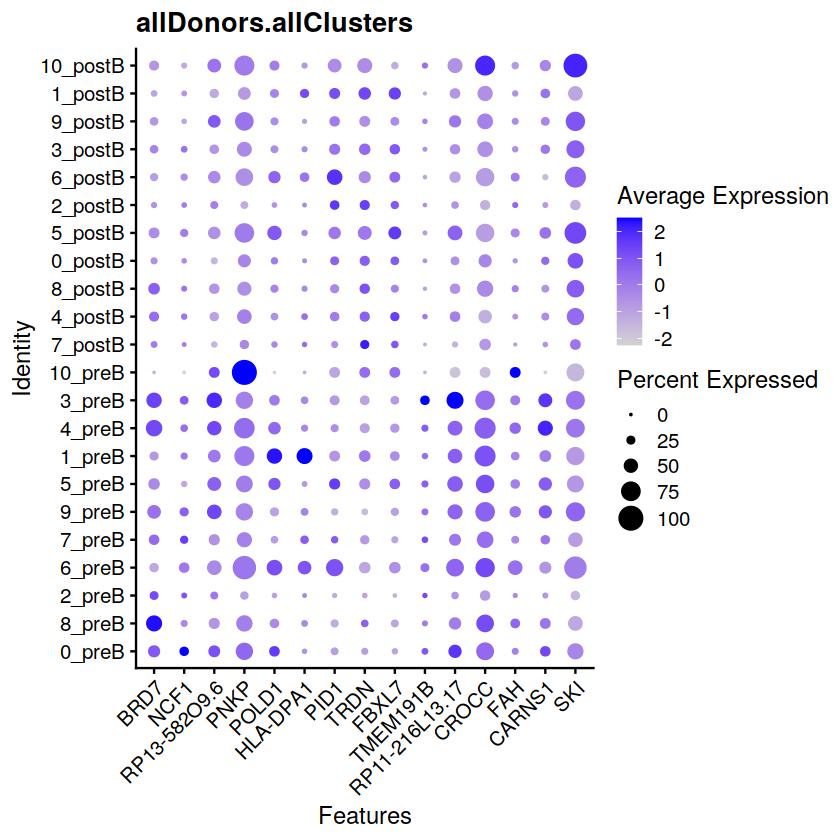

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



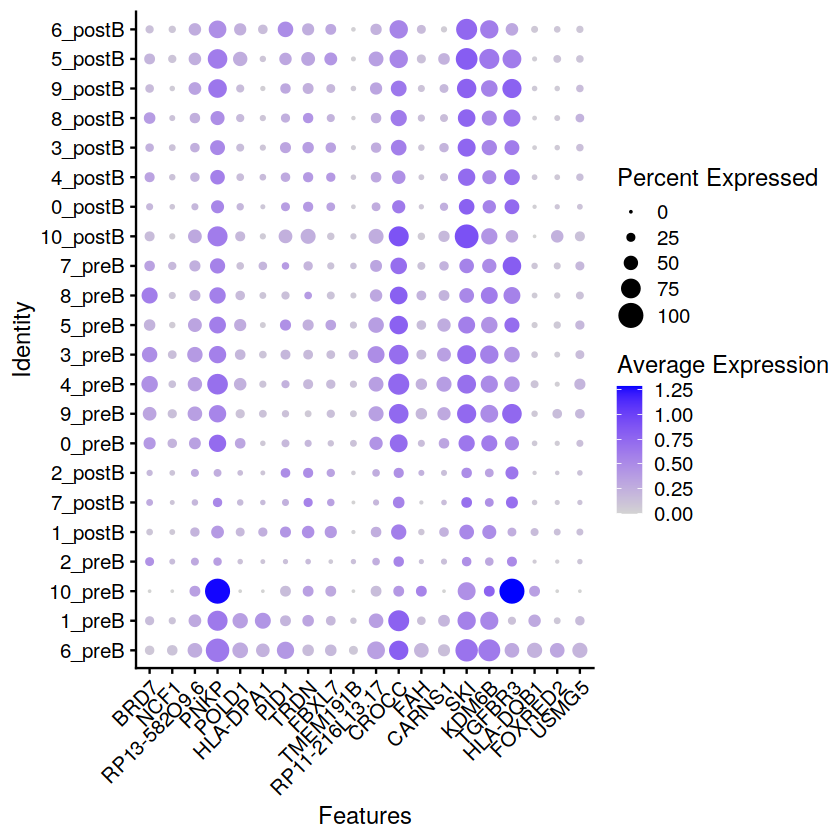

In [31]:
all.names.sig <- unique(all.names.sig)
de.plots(se, all.names.sig, btwnConds_inClust.outdir, curr.name="allDonors.allClusters", max.size=15)

dot <- DotPlot(se, scale=FALSE,
               features = head(all.names.sig,20), 
               cluster.idents=T) + RotatedAxis()
dot
ggsave(file.path(btwnConds_inClust.outdir, "allDonors.allClusters.top3de.png"))
ggsave(file.path(btwnConds_inClust.outdir, "allDonors.allClusters.top3de.pdf"))

## b) averaged top p-values (only average ones that were DE)

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



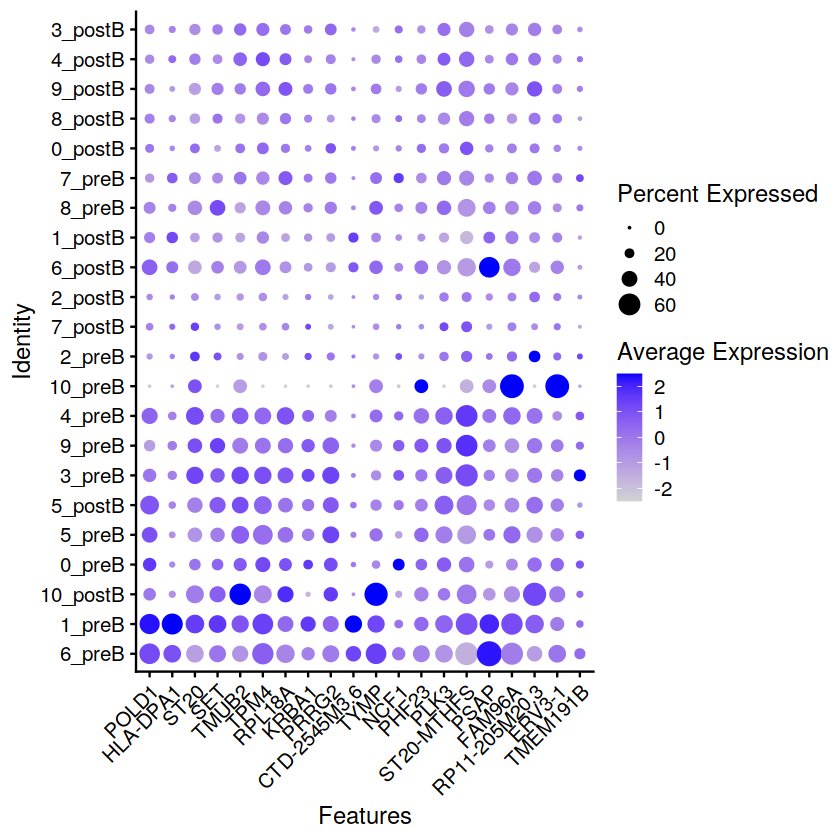

In [32]:
sig.all.ordered <- sort(rowMeans(-log10(all.pvals),na.rm=T), decreasing=T)
dot <- DotPlot(se, scale=T,
               features = names(head(sig.all.ordered,20)), 
               cluster.idents=T) + RotatedAxis()
dot
ggsave(file.path(btwnConds_inClust.outdir, "allDonors.allClusters.pvalsOrdered.png"))
ggsave(file.path(btwnConds_inClust.outdir, "allDonors.allClusters.pvalsOrdered.pdf"))
#de.plots(se, names(sig.all.ordered), outdir, curr.name="allDonors.allClusters.pvalsOrdered", max.size=20)

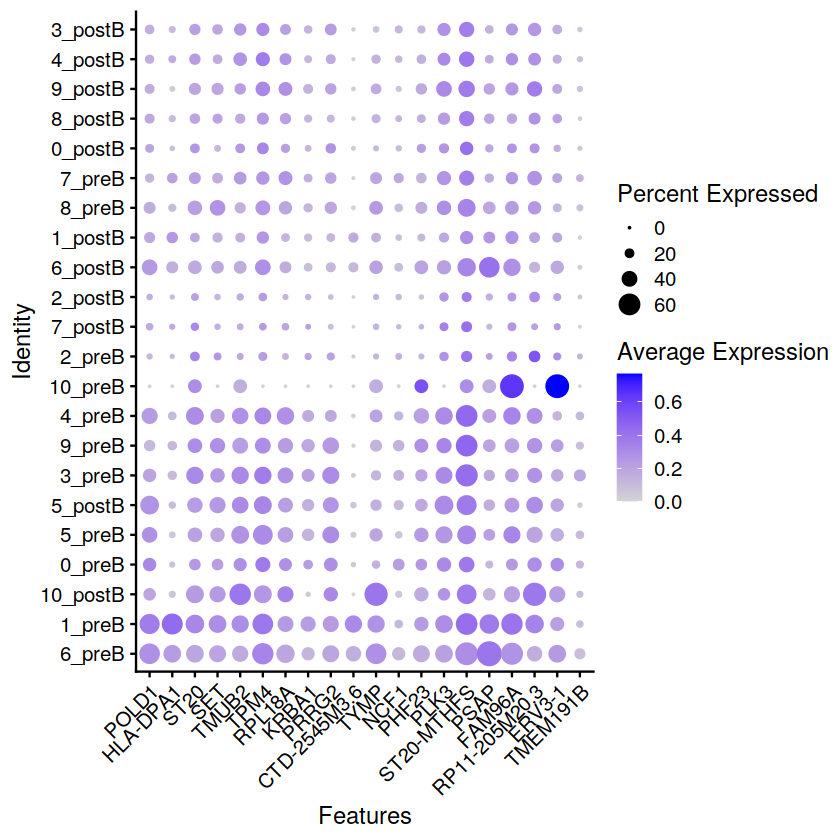

In [33]:
sig.all.ordered <- sort(rowMeans(-log10(all.pvals),na.rm=T), decreasing=T)
dot <- DotPlot(se, scale=F,
               features = head(names(sig.all.ordered),20), 
               cluster.idents=T) + RotatedAxis()
dot


--------

In [34]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.3 LTS

Matrix products: default
BLAS/LAPACK: /home/isaac/miniconda3/envs/mttrace/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] circlize_0.4.13           future_1.23.0            
 [3] RColorBrewer_1.1-2        metap_1.1                
 [5] cowplot_1.1.1             magrittr_2.0.1           
 [7] data.table_1.14.2         patchwork_1.1.1          
 [9] ggplot2_3.3.5             EnsDb.Hsapiens.v75_2.99.0
[11] 

In [35]:
outdir

[1] "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0_logfc0.01/"